# Исследование закономерностей, определяющих успешность компьютерных игр.


В нашем распоряжении исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation.
  

Цель нашего проекта 
    
Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании


В данном исследовании будем придерживаться следующего плана:


 
1. Изучим информацию
2. Подготовим данные для исследования
3. Проведем исследовательсвкий анализ по выявлению закономерностей
4. Составим портреты пользователей
5. Проверим гипотезы
6. Вывод


### Откроем файл с данными и изучим общую информацию. 

In [2]:
import pandas as pd #импортируем библиотеку pandas
import matplotlib.pyplot as plt #импортируем библиотеку matplotlib.pyplot
import numpy as np
from scipy import stats as st
pd.set_option('display.max_columns', None)



#### Считаем данные из csv-файла в датафрейм и сохраним в переменную data

In [3]:
data = pd.read_csv('/datasets/games.csv') #сохраняем в датафрейм 
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Выведем основную информацию о датафрейме с помощью метода info()

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.shape

(16715, 11)

In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Подготовим данные


#### Изменим названия столбцов   

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
data.info() #проверим названия столбцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Преобразуем данные в нужные типы 

В таблице присутствут данные о дате выпуска игр, столбец 'year_of_release', но тип этих данных float. Для корректного обращения к этим данным при анализе, переведем их в тип Int

In [10]:
data['year_of_release'] = pd.array(data['year_of_release'], dtype=pd.Int64Dtype())

In [11]:
data['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

Так же имеет смысл изменить тип данных в столбце 'user_score', так как в нем содержатся оценки. Изменим тип данных на float64. 

In [12]:
data['user_score'].unique() # посмотрим уникальные значения в столбце

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце так же есть значение 'tbd', в 2424 строках. Это аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.
Дополнительной информации по принятым решениям у нас нет, поэтому заменим это значение на 'NaN'.

Изменим тип данных и заменим значение 'tbd' на NaN

In [13]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [14]:
data['user_score'].value_counts().head(20)

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
7.5    251
7.9    249
8.1    244
7.7    240
7.3    236
8.4    223
7.6    220
7.0    220
7.4    215
8.6    211
6.8    197
8.7    188
8.8    186
7.1    180
7.2    167
Name: user_score, dtype: int64

In [15]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


#### Рассмотрим пропуски и дубликаты в данных 

In [17]:
data.duplicated().sum()# посчтитаем полные дубликаты

0

Рассмотрим уникальные значение в столбцах:

In [18]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [19]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [20]:
data['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [21]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Найдем количество пропусков по столбцам:

In [22]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Посмотрим в %ом соотношение количество пропусков по столбцам:

In [23]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
platform - 0%
year_of_release - 2%
genre - 0%
na_sales - 0%
eu_sales - 0%
jp_sales - 0%
other_sales - 0%
critic_score - 51%
user_score - 55%
rating - 40%


Рассмотрим строки, в ячейках которых есть пропуски:

##### Столбец 'name'

In [24]:
data.loc[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце 'name' всего два пропуска

##### Столбец 'year_of_release'

In [25]:
data.loc[data['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Посмотрим на пропуска в столбце 'year_of_release' группирую данные по-разному, возможно есть какие-то закономерности

пропуски по платформам:

In [26]:
data.loc[data['year_of_release'].isnull()].pivot_table(index='platform', values='name', aggfunc='count').sort_values(by='name')

,name
platform,
GB,1
PSV,1
N64,3
PS,7
3DS,8
GBA,11
GC,14
PSP,16
2600,17


In [27]:
data.loc[data['year_of_release'].isnull()].pivot_table(index=['platform','name'], values='genre', aggfunc='count').\
sort_values(by='name', ascending=False).head(60)

genre
platform name                                                     
PS2      wwe Smackdown vs. Raw 2006                              1
         eJay Clubworld                                          1
Wii      Zero: Tsukihami no Kamen                                1
         Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)              1
PS2      Yu Yu Hakusho: Dark Tournament                          1
X360     Yoostar on MTV                                          1
PS3      Yakuza 4                                                1
DS       Writing and Speaking Beautiful Japanese DS              1
X360     World of Tanks                                          1
XB       Without Warning                                         1
Wii      Wii de Asobu: Metroid Prime                             1
PS2      Wheel of Fortune                                        1
X360     Wet                                                     1
GBA      WarioWare: Twisted!                                     1
PC       WRC: FIA World Rally Championship                       1
X360     WRC: FIA World Rally Championship                       1
PS3      WRC: FIA World Rally Championship                       1
N64      WCW Backstage Assault                                   1
GC       Virtua Quest                                            1
PS2      Virtua Quest                                            1
Wii      Vegas Party                                             1
PSP      Valkyria Chronicles III: Unrecorded Chronicles          1
XB       Unreal Championship 2: The Liandri Conflict             1
PS3      Umineko no Naku Koro ni San: Shinjitsu to Genso...      1
PS       Twisted Metal: Small Brawl                              1
GC       Tube Slider                                             1
X360     Tropico 4                                               1
PS       Triple Play 99                                          1
PS2      Tribes: Aerial Assault                                  1
Wii      Trauma Team                                             1
XB       Transworld Surf                                         1
X360     Tour de France 2011                                     1
DS       Tornado                                                 1
Wii      Tony Hawk's Downhill Jam                                1
PC       Tomb Raider (2013)                                      1
XB       Tom and Jerry in War of the Whiskers                    1
         Tom Clancy's Rainbow Six: Critical Hour                 1
Wii      Tiger Woods PGA Tour 07                                 1
PS3      The Lord of the Rings: War in the North                 1
X360     The Lord of the Rings: War in the North                 1
GBA      The Legend of Zelda: The Minish Cap(weekly JP s...      1
XB       The King of Fighters: Maximum Impact - Maniax           1
PS3      The History Channel: Great Battles - Medieval           1
3DS      The Hidden                                              1
PSP      The Golden Compass                                      1
Wii      The Golden Compass                                      1
PS       The Dukes of Hazzard II: Daisy Dukes It Out             1
DS       The Daring Game for Girls                               1
Wii      The Daring Game for Girls                               1
XB       The Chronicles of Riddick: Escape from Butcher Bay      1
GBA      The Chronicles of Narnia: The Lion, The Witch a...      1
GC       The Chronicles of Narnia: The Lion, The Witch a...      1
PS3      Test Drive Unlimited 2                                  1
PC       Test Drive Unlimited 2                                  1
X360     Test Drive Unlimited 2                                  1
GBA      Teen Titans                                             1
PC       TERA                                                    1
Wii      Swords                                                  1
PS2      Sword of the Samurai            

Посмотрим на общую талбицу выпуска игр по годам для ознакомления:

In [28]:
data.pivot_table(index='year_of_release', columns ='platform', values='name', aggfunc='count').head()

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Игра на платформе DS в 1985 г вероятнее всего ошибка. Удалим эту строку, для корректных вычислений, ниже.

Пропуски в столбе "year_of_release" имеют случайный характер. Они присутствуют как в играх() на свежих платформах, так и на старых платформах. Скорее всего это человеческий фактор, данные были просто не внесены. Отметим, что некоторые пропуски присутствуют в играх с идентичным названием, но созданные на разных платформах.

In [29]:
data.loc[(data['platform']=='DS')&(data['year_of_release']==1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN


##### Столбец 'genre'

In [30]:
data.loc[data['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего два пропуска.

##### Столбец 'critic_score'

In [31]:
data.loc[data['critic_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Рассмотрим данные, применив группировку, добавив в условие пропуски в оценках критиков

In [32]:
data.loc[data['critic_score'].isnull()].pivot_table(index='year_of_release', values='name', aggfunc='count').\
sort_values(by='year_of_release')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,13
1986,21
1987,16
1988,14


Посмотрим распределение отзывов по платформам:

In [33]:
game_critic_null = data.loc[data['critic_score'].isnull()].pivot_table(index='platform', values='name', aggfunc='count').\
reset_index()
data.loc[data['critic_score'].isnull()].pivot_table(index='platform', values='name', aggfunc='count')#.sort_values(by='year_of_release')

,name
platform,
2600,133
3DO,3
3DS,352
DC,38
DS,1434
GB,98
GBA,384
GC,108
GEN,27


In [34]:
game_critic = data.pivot_table(index='platform', values='name', aggfunc='count').reset_index()
data.pivot_table(index='platform', values='name', aggfunc='count')

,name
platform,
2600,133
3DO,3
3DS,520
DC,52
DS,2151
GB,98
GBA,822
GC,556
GEN,27


In [35]:
game_critic['plat_with_critic'] = game_critic['name']-game_critic_null['name']
game_critic

,platform,name,plat_with_critic
0,2600,133,0
1,3DO,3,0
2,3DS,520,168
3,DC,52,14
4,DS,2151,717
5,GB,98,0
6,GBA,822,438
7,GC,556,448
8,GEN,27,0
9,GG,1,0


Из расчетов видно, что отзывов критиков нет на многих платформах:

In [36]:
game_critic_null = game_critic['platform'].loc[(game_critic['plat_with_critic']==0)].tolist()
game_critic_null

['2600',
 '3DO',
 'GB',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PCFX',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS']

Посмотрим на данные по этим платформам:

In [37]:
data_critic_null = data.query('platform in @game_critic_null')
data_critic_null.pivot_table(index='year_of_release', values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,12
1986,21
1987,16
1988,14


In [38]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Из таблиц видно, что с 1980 по 1993 год отзывов критиков практически не было, скорее всего это связано с тем, что доступа к сети интернет для обычных пользователей в эти годы еще не было. Глобальная сеть использовалась исключительно для исследовательских и образовательных целей. С распространением интернета среди обычных пользователей видим, что разница между играми, на которые есть отзыв, и играми, на которые нет отзывов, стремительно растет. А с 2002 года, игр, на которые нет отзывов, нет.

In [39]:
data.loc[data['critic_score'].isnull()].pivot_table(index='genre', values='name', aggfunc='count')

,name
genre,
Action,1479
Adventure,980
Fighting,440
Misc,1227
Platform,391
Puzzle,356
Racing,507
Role-Playing,761
Shooter,379


##### Столбец 'user_score'

In [40]:
data.loc[data['user_score'].isnull()].pivot_table(index='year_of_release', values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,13
1986,21
1987,16
1988,14


Посмотрим на пропуски в 'user_score' так же по годам:

In [41]:
game_user_null = data.loc[data['user_score'].isnull()].\
pivot_table(index='platform', values='name', aggfunc='count').reset_index()

data.loc[data['user_score'].isnull()].pivot_table(index='platform', values='name', aggfunc='count')

game_user = data.pivot_table(index='platform', values='name', aggfunc='count').reset_index()
data.pivot_table(index='platform', values='name', aggfunc='count')

game_user['plat_with_user'] = game_user['name']-game_user_null['name']
game_user


,platform,name,plat_with_user
0,2600,133,0
1,3DO,3,0
2,3DS,520,174
3,DC,52,14
4,DS,2151,516
5,GB,98,0
6,GBA,822,255
7,GC,556,366
8,GEN,27,0
9,GG,1,0


In [42]:
game_user_null = game_user['platform'].loc[(game_user['plat_with_user']==0)].tolist()
game_user_null

['2600',
 '3DO',
 'GB',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PCFX',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS']

In [43]:
game_critic_null

['2600',
 '3DO',
 'GB',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PCFX',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS']

Из анализа данных видим, что причины пропусков в столбце 'user_score' с оценками пользователей аналогичны причинам пропусков в столбце 
 'critic_score'. Отсутсвие доступа жителей к сети Интернет.

##### Столбец 'rating'

In [44]:
data.loc[data['rating'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [45]:
data.loc[data['rating'].isnull()].pivot_table(index='year_of_release', values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,13
1986,21
1987,16
1988,14


In [46]:
game_rating_null = data.loc[data['rating'].isnull()].\
pivot_table(index='platform', values='name', aggfunc='count').reset_index()

game_rating = data.pivot_table(index='platform', values='name', aggfunc='count').reset_index()

In [47]:
game_rating['plat_with_rating'] = game_rating['name']-game_rating_null['name']
game_rating

,platform,name,plat_with_rating
0,2600,133,0
1,3DO,3,0
2,3DS,520,228
3,DC,52,14
4,DS,2151,1273
5,GB,98,0
6,GBA,822,522
7,GC,556,469
8,GEN,27,0
9,GG,1,0


Пропуски в столбце, как и ожидалось, так же связаны с распространением интернета.

In [48]:
data['rating'] = data['rating'].fillna('no _info')

Удалим строки с пропусками в столбцах 'name', 'year_of_release'. В столбце 'name' всего два пропуска, и в этих строках так же есть пропуски в других столбцах (в т.ч. пропуски в столбце 'genre'), большой потери не будет при удалении. Пропусков в столбце 'year_of_release' - 269. Заполнить эти пропуски мы ничем не можем. Поскольку анализ будет проводиться по годам, эти строки не дадут нам нужной информации, и пропусков мало - можем их удалить без ущерба для анализа.
По пропускам в 'name', 'year_of_release', 'genre' можно сказать, что они не внесены случайно, при детальном рассмотрении строк с этими пропусками, закономерности не выявлено. Пропусков в 'name',  'genre' можно объяснить отсутствием информации по двум играм, т.к. они выпущены давно, в 1993 г.
Пропуски в остальных стобцах: 'rating', 'user_score', 'critic_score'  обусловлены отсутсвием доступа к сети Интернет с 1980 по 1993 год для обычных пользователей. Глобальная сеть использовалась исключительно для исследовательских и образовательных целей. С распространением интернета среди обычных пользователей видим, что разница между играми, на которые есть отзыв, и играми, на которые нет отзывов, стремительно растет. А с 2002 года, игр, на которые нет отзывов критиков, нет. Но присутсвуют игры и после 2002, в которых отсутствуют отзывы пользователей, возможно эти игры не вдохновили никого на написание отзыва.
Пропуски в столбце 'rating' замолнили на 'no _info'

Удалим строчки с пропусками путем создания нового датафрейма, чтобы не потерять первоначальную информацию

In [49]:
data_filtr = data[(~data['year_of_release'].isna()) & (~data['name'].isna())]

In [50]:
data.loc[(data['year_of_release']==1985)&(data['platform']=='DS'),'platform']
row = data_filtr.loc[(data_filtr['platform']=='DS') & (data_filtr['year_of_release']==1985)].index
data_filtr = data_filtr.drop(index=row)

In [51]:
data_filtr

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no _info
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no _info
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no _info
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no _info
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no _info
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no _info


При удалении потеря данных составила около 1.6 %, это не критично.

Подведем итог обзора данных:
    
- мы привели названия столбцов к общепринятому виду;
- изменили типы данных в соответсвии с их содержанием;
- проверили данные на наличие дубликатов: явных дубликатов не обнаружено;
- проверили данные на наличие пропусков. Определили их причины и заполнили их там, где это имело смысл. Удалили строки, где пропуски имели критическое значение;
- нашли аномальное значение, удалили его.


#### Посчитаем суммарные продажи во всех регионах

Суммарные продажи во всех регионах добавим в столбец 'all_sales'

In [52]:
data_filtr['all_sales'] = data_filtr[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis='columns')

In [53]:
data_filtr.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no _info,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no _info,31.38


### Проведем исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы. (Важны ли данные за все периоды?)

In [54]:
data_filtr_hist = data_filtr.groupby('year_of_release')['name'].count().head(50).to_frame()
data_filtr_hist['years'] = data_filtr_hist.index
data_filtr_hist


,name,years
year_of_release,,
1980,9,1980
1981,46,1981
1982,36,1982
1983,17,1983
1984,14,1984
1985,13,1985
1986,21,1986
1987,16,1987
1988,15,1988


Text(0.5, 1.0, 'Распределение суммарного количества игр по годам')

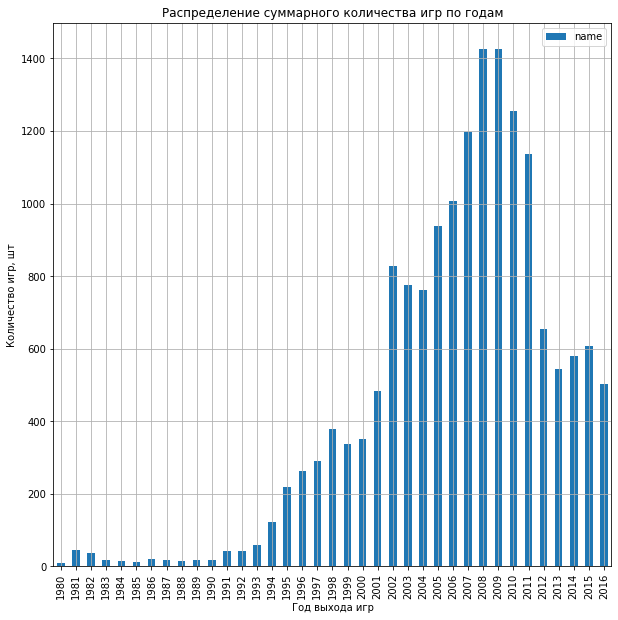

In [55]:
data_filtr_hist.plot(kind = 'bar', x='years', y='name',figsize=(10,10), grid = True)
plt.xlabel('Год выхода игр', fontsize=10)
plt.ylabel('Количество игр, шт',fontsize=10)
plt.title(f'Распределение суммарного количества игр по годам', fontsize=12)

Для корректного анализа нам необхимы примерно одинаковые выборки по годам и так же стоит учесть, что развитие ИТ-технологий стремительно и брать годы выхода первых игр для прогнозироания кампаний на 2017 год не имеет смысла.

#### Посмотрим, как менялись продажи по платформам

##### Посмотрим на суммарные продажи платформ за все года:

In [56]:
data_filtr.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)
#all_sales

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


##### Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. (За какой характерный срок появляются новые и исчезают старые платформы?)

Возьмем первые top_6 платформ, они наиболее выделяются по суммарным продажам: 

In [57]:
data_filtr.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no _info,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no _info,31.38


In [58]:
top_6 = data_filtr.pivot_table(index='platform', values='all_sales', aggfunc='sum').\
sort_values(by='all_sales', ascending=False).head(6)
top_6

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58


In [59]:
top_6_list = top_6.index.tolist()
top_6_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Распределение объема продаж по платформам top_6 по годам:

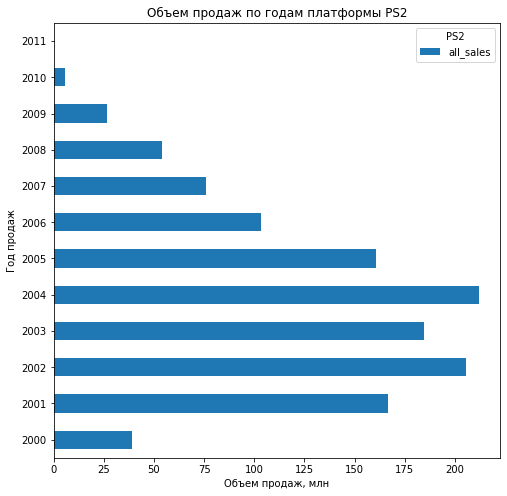

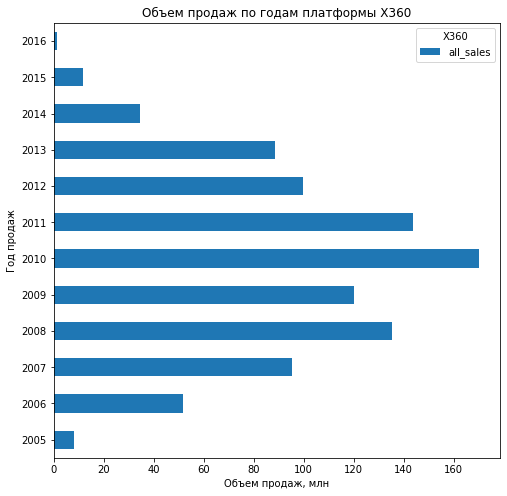

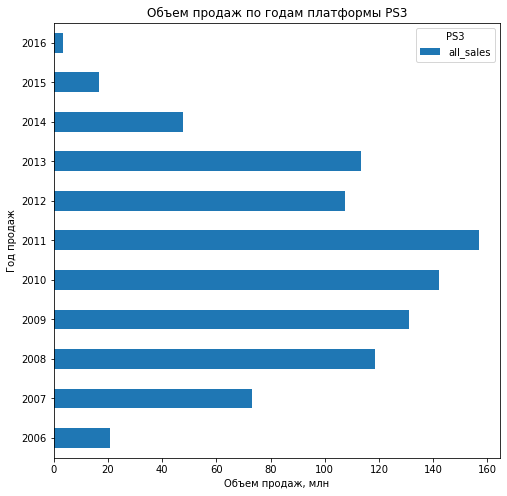

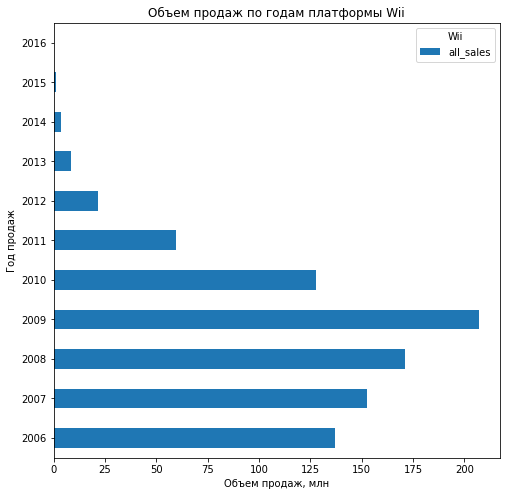

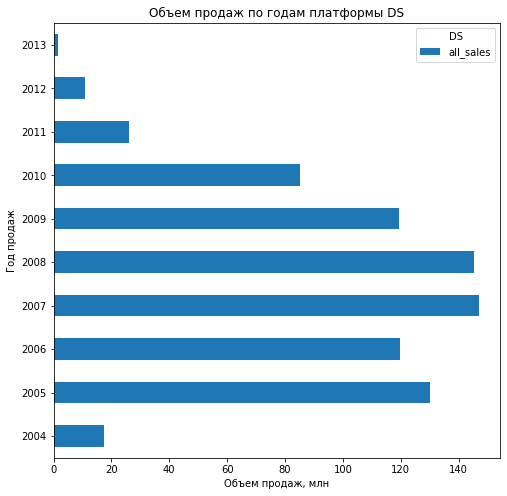

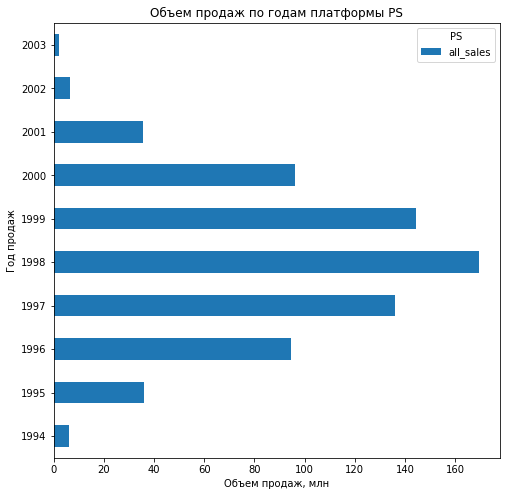

In [60]:
for plat in top_6_list:
    data_filtr.query('platform == @plat').\
    pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').sort_values(by='year_of_release').\
    plot(kind='barh', fontsize=10, figsize=(8,8))
    plt.xlabel('Объем продаж, млн', fontsize=10)
    plt.ylabel('Год продаж',fontsize=10)
    plt.title(f'Объем продаж по годам платформы {plat}', fontsize=12)
    plt.legend(title=f'{plat}')
    

По графикам можно сказать, что с начала появления платформы на рынке, объем продаж растет около 5-6 лет, потом идет на спад, платформа уходит с рынка

##### Характерный срок появления новых и исчезновения старых платформ

Найдем среднее значение цикла жизни платформы, возьмем top_6 платформ:

In [61]:
mean_life = []
for plat in top_6_list:
    years_of_life = data_filtr.query('platform == @plat')
    s = years_of_life['year_of_release'].max() - years_of_life['year_of_release'].min()
    mean_life.append(s)
print(mean_life)
sum(mean_life)/len(mean_life)


[11, 11, 10, 10, 9, 9]


10.0

Получили значение - 10 лет, время, за которое платформа появляется, живет и исчезает с рынка.

#### Возьмем данные за соответствующий актуальный период. Актуальный период определим из результатов исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год

Мы расчитали среднее время жизни платформы - 10 лет. За это время она появляется, объемы продаж игр на данной платформе растут, достигают пика и начинают снижаться, платформа постепенно перестает существовать для рынка. Пик объема продаж приходися на 5-6 год после появления платформы, что мы видели на графиках выше (ниже приведет еще раз один из графиков). Для того, чтобы построить прогноз на 2017 г, необходимо рассмотреть платформы, пояление которых было не ранее 2012-2013 гг, т.е. объемы продаж игр на этих платформах либо растут, находятся на пике. Если взять период раньше, могут попасть платформы, продажи которых в 2017 будут падать. К тому же ситуация на рынке сферы IT быстро меняется, поэтому возьмем данные с 2014 года.


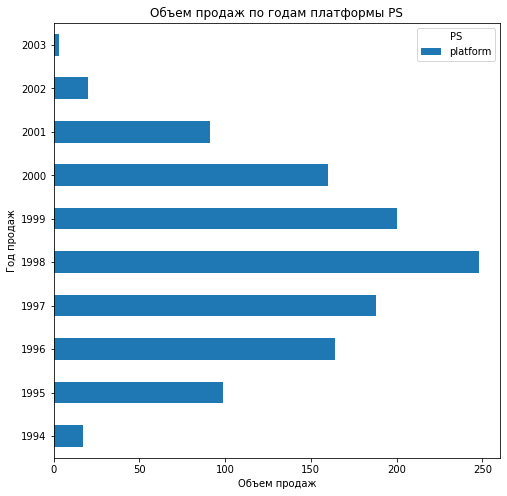

In [62]:
data_filtr.query('platform == "PS"').\
pivot_table(index='year_of_release', values='platform', aggfunc='count').sort_values(by='year_of_release').\
plot(kind='barh', fontsize=10, figsize=(8,8))
plt.xlabel('Объем продаж', fontsize=10)
plt.ylabel('Год продаж',fontsize=10)
plt.title('Объем продаж по годам платформы PS', fontsize=12)
plt.legend(title='PS')

#### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ

Создадим датафрейм с данными с 2014 года

In [63]:
data_filtr_6_year = data_filtr.query('year_of_release >= 2014')
data_filtr_6_year.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no _info,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no _info,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no _info,7.98


In [64]:
data_filtr_6_year.loc[data_filtr_6_year['rating']=='no _info'].\
pivot_table(index=['platform','name'], values='genre', aggfunc='count').\
sort_values(by='name', ascending=False).head(60)

genre
platform name                                                     
XOne     Zombie Army Trilogy                                     1
PS4      Zombie Army Trilogy                                     1
         ZombiU                                                  1
XOne     ZombiU                                                  1
PSV      Zettai Kaikyuu Gakuen: Eden with Roses and Phan...      1
         Yuusha Shisu.                                           1
         Yuki Yuna is a Hero: Memory of the Forest               1
         Ys VIII: Lacrimosa of Dana                              1
3DS      Yowamushi Pedal                                         1
PS3      Yoru no Nai Kuni                                        1
PS4      Yoru no Nai Kuni                                        1
PSV      Yoru no Nai Kuni                                        1
         Yomawari                                                1
3DS      Yokai Watch Busters                                     1
         Yokai Watch 3                                           1
         Yokai Watch 2 Shinuchi                                  1
         Yokai Watch 2 Ganso/Honke                               1
         Yokai Sangokushi                                        1
WiiU     YoKai Watch Dance: Just Dance Special Version           1
PS3      Yakuza: Ishin                                           1
PS4      Yakuza: Ishin                                           1
         Yakuza Zero: The Place of Oath                          1
PS3      Yakuza Zero: The Place of Oath                          1
PS4      Yakuza Kiwami                                           1
PS3      Yakuza Kiwami                                           1
PSV      Yahari Game Demo Ore no Seishun Love-Kome wa Ma...      1
3DS      Xenoblade Chronicles                                    1
PSV      World Trigger: Borderless Mission                       1
XOne     Wolfenstein: The Old Blood                              1
PS4      Wolfenstein: The Old Blood                              1
         Winning Post 8 2016                                     1
PSV      Winning Post 8 2016                                     1
         Winning Post 8 2015                                     1
PS3      Winning Post 8 2015                                     1
         Winning Post 8                                          1
PSV      Winning Post 8                                          1
PS4      Wasteland 2                                             1
         Warriors Orochi 3                                       1
XOne     Warriors Orochi 3                                       1
PS4      Warhammer: The End Times - Vermintide                   1
PC       War for the Overworld                                   1
PSV      Wand of Fortune R                                       1
PS3      WRC 5: FIA World Rally Championship                     1
PS4      WRC 5: FIA World Rally Championship                     1
XOne     WRC 5: FIA World Rally Championship                     1
PSV      WRC 5: FIA World Rally Championship                     1
PS4      Valkyria Chronicles                                     1
PSV      Utawarerumono: Itsuwari no Kamen                        1
PS3      Utawarerumono: Itsuwari no Kamen                        1
PS4      Utawarerumono: Itsuwari no Kamen                        1
PS3      Utawarerumono: Futari no Hakuoro                        1
PSV      Utawarerumono: Futari no Hakuoro                        1
PS4      Utawarerumono: Futari no Hakuoro                        1
PSV      Uta no Prince-Sama: Music 3                             1
PSP      Uta no Prince-Sama: All Star After Secret               1
PSV      Uta Kumi 575                                            1
         Uppers                                                  1
PS3      Under Night In-Birth                                    1
         Ukiyo no Shishi                 

In [65]:
data_filtr_6_year.loc[data_filtr_6_year['rating']=='no _info'].pivot_table(index=['platform'], values='name', aggfunc='count').\
sort_values(by='name', ascending=False).head(60)

,name
platform,
PSV,214
3DS,138
PS4,136
PS3,106
XOne,59
PC,41
WiiU,20
X360,20
PSP,13


In [66]:
data_filtr_6_year.pivot_table(index=['platform'], values='name', aggfunc='count').\
sort_values(by='name', ascending=False).head(60)

,name
platform,
PS4,376
PSV,295
XOne,228
PS3,219
3DS,212
PC,151
X360,111
WiiU,73
PSP,13


In [67]:
#посмотрим какие платформы попали в срез
data_filtr_6_year.pivot_table(index='platform', columns= 'year_of_release', values='all_sales', aggfunc='sum')

year_of_release,2014,2015,2016
platform,,,
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.60
PS4,100.00,118.90,69.25
PSP,0.24,0.12,NaN
PSV,11.90,6.25,4.25
Wii,3.75,1.14,0.18
WiiU,22.03,16.35,4.60
X360,34.74,11.96,1.52


Text(0.5, 1.0, 'Объем продаж по годам платформ')

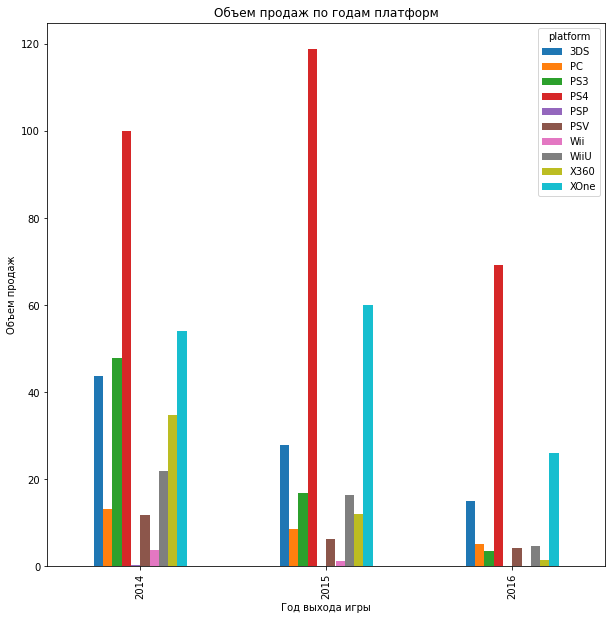

In [68]:
data_filtr_6_year.pivot_table(index='year_of_release', columns= 'platform', values='all_sales', aggfunc='sum').\
plot(kind='bar', fontsize=10, figsize=(10,10))
plt.xlabel('Год выхода игры', fontsize=10)
plt.ylabel('Объем продаж',fontsize=10)
plt.title('Объем продаж по годам платформ', fontsize=12)

Для наглядности так же выведем таблицу объема продаж игр на платформах по годам:

In [69]:
data_filtr_6_year.pivot_table(index='year_of_release', columns= 'platform', values='all_sales', aggfunc='sum')
#.sort_values(by='all_sales', ascending=False)#.reset_index()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Для лучшего понимая, на какой стадии находится платформа, посмотрим данные за 10 лет:

In [70]:
data_filtr_10_year = data_filtr.query('year_of_release >= 2006').\
pivot_table(index='year_of_release', columns= 'platform', values='all_sales', aggfunc='sum')
data_filtr_10_year

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2006,NaN,NaN,119.81,5.28,11.26,2.85,103.42,20.96,NaN,55.32,NaN,137.15,NaN,51.62,10.04,NaN
2007,NaN,0.02,146.94,3.40,0.27,9.28,75.99,73.19,NaN,46.93,NaN,152.77,NaN,95.41,0.55,NaN
2008,NaN,0.04,145.31,NaN,NaN,12.42,53.90,118.52,NaN,34.55,NaN,171.32,NaN,135.26,0.18,NaN
2009,NaN,NaN,119.54,NaN,NaN,16.91,26.40,130.93,NaN,37.78,NaN,206.97,NaN,120.29,NaN,NaN
2010,NaN,NaN,85.02,NaN,NaN,24.28,5.64,142.17,NaN,35.04,NaN,127.95,NaN,170.03,NaN,NaN
2011,63.20,NaN,26.18,NaN,NaN,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN,NaN
2012,51.36,NaN,11.01,NaN,NaN,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN,NaN
2013,56.57,NaN,1.54,NaN,NaN,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,NaN,18.96
2014,43.76,NaN,NaN,NaN,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,NaN,54.07


In [71]:
data_filtr_10_year.describe()

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
count,6.000000,2.000000,8.000000,2.000000,2.000000,11.000000,6.000000,11.000000,4.000000,10.000000,6.000000,11.000000,5.000000,11.000000,3.000000,4.000000
mean,42.968333,0.030000,81.918750,4.340000,5.765000,14.856364,44.300000,84.667273,78.535000,23.863000,8.968333,81.016364,16.438000,86.635455,3.590000,39.830000
std,18.278261,0.014142,60.595308,1.329361,7.771104,9.445538,40.815239,54.637565,40.567917,20.558189,4.729695,79.136330,7.068244,55.422714,5.588927,20.313977
min,15.140000,0.020000,1.540000,3.400000,0.270000,2.850000,0.450000,3.600000,25.990000,0.120000,4.250000,0.180000,4.600000,1.520000,0.180000,18.960000
25%,31.775000,0.025000,22.387500,3.870000,3.017500,8.900000,10.830000,34.360000,58.435000,4.277500,5.035000,6.170000,16.350000,43.180000,0.365000,24.352500
50%,47.560000,0.030000,102.280000,4.340000,5.765000,12.420000,40.150000,107.360000,84.625000,26.185000,8.420000,59.650000,17.560000,95.410000,0.550000,40.110000
75%,55.267500,0.035000,126.185000,4.810000,8.512500,20.065000,70.467500,124.725000,104.725000,37.095000,11.572500,144.960000,21.650000,127.775000,5.295000,55.587500
max,63.200000,0.040000,146.940000,5.280000,11.260000,35.030000,103.420000,156.780000,118.900000,55.320000,16.190000,206.970000,22.030000,170.030000,10.040000,60.140000


Выбрали потенциально прибильные платформы: 3DS, PC, PS4, XOne, WiiU, PSV. Остальные платформы не вошли в список, т.к. их цикл жизни подошел к концу: DC,	DS,	GBA, GC, PS2, PSP, XB; платформа PS3, Wii, X360 возможно еще останутся на рынке, но их исключаем из-за резкого снижения в 2015-2016 гг, в 2017 г возможно их объемы продаж будут стремиться к 0. 

In [72]:
data_filtr_6_top = data_filtr_6_year.query('platform in ["3DS", "PC", "PS4", "XOne", "WiiU", "PSV"]')
data_filtr_6_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no _info,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no _info,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no _info,7.98


#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [73]:
data_filtr_6_top.pivot_table(index='platform', values='all_sales', aggfunc='sum').\
sort_values(by='all_sales', ascending=False).reset_index()

,platform,all_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,WiiU,42.98
4,PC,27.05
5,PSV,22.40


In [74]:
import seaborn as sns

Text(0, 0.5, 'Объем продаж')

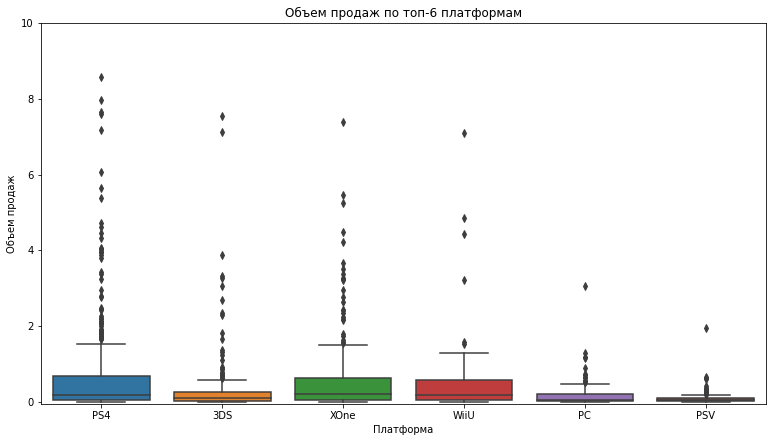

In [75]:
plt.figure(figsize=(13,7))
plt.ylim(-0.05, 10)
sns.boxplot(data=data_filtr_6_top, x='platform', y='all_sales');
plt.title('Объем продаж по топ-6 платформам', fontsize=12)
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Объем продаж',fontsize=10)

Text(0, 0.5, 'Объем продаж')

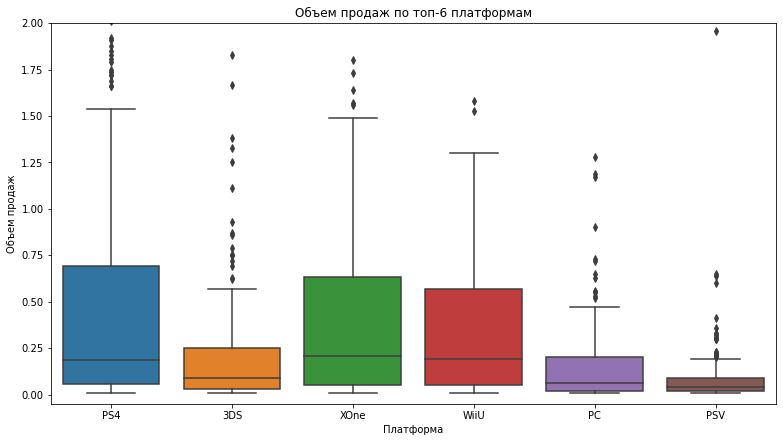

In [76]:
plt.figure(figsize=(13,7))
plt.ylim(-0.05, 2)
sns.boxplot(data=data_filtr_6_top, x='platform', y='all_sales');
plt.title('Объем продаж по топ-6 платформам', fontsize=12)
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Объем продаж',fontsize=10)

Из графика можно сделать вывод, что медианные значения продаж шести платфом разные, самые большие значения у платформ PS4, XOne и WiiU, самое низкое у платформы PSV. Объемы продаж PS4 и XOne обусловлены высоким значением продаж, соответствующему верхнему квартилю, на платформе PS4 так же видны многочисленные выбросы достаточно больших значений- их дают несколько игр. Эти факторы обеспечивают в итоге большие объемы продаж на этой платформе. Не смотря на то, что медиана и верхний квартили 3DS заметно меньше, многочисленные выбросы больших значений так же обеспечивают в целом большой объем продаж игр на этой платформе.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Для анализа корреляций возьмем платформу 3DS, данные по ней есть за все годы актуального периода

In [77]:
data_filtr_3DS = data_filtr_6_year.query('platform =="3DS"')
data_filtr_3DS.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no _info,11.68
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,no _info,7.55
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,no _info,7.14
312,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89
406,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,NaN,NaN,no _info,3.32


(20.0, 100.0)

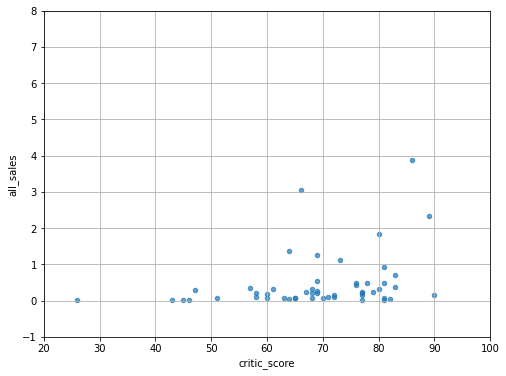

In [78]:
data_filtr_6_year.query('platform =="3DS"').\
plot(x='critic_score', y='all_sales', kind='scatter', figsize=(8, 6), grid=True, alpha=0.7)

plt.ylim(-1,8)
plt.xlim(20,100)

In [79]:
data_filtr_3DS['critic_score'].corr(data_filtr_3DS['all_sales'])# коэф корреляции

0.314117492869051

(2.0, 10.0)

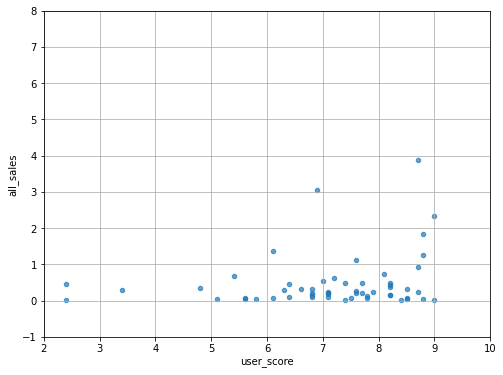

In [80]:
data_filtr_6_year.query('platform =="3DS"').\
plot(x='user_score', y='all_sales', kind='scatter', figsize=(8, 6), grid=True, alpha=0.7)

plt.ylim(-1,8)
plt.xlim(2,10)

In [81]:
data_filtr_3DS['user_score'].corr(data_filtr_3DS['all_sales'])#коэф корреляции

0.2151932718527028

Посмотрим на зависимость, выделив на данной платформе один жанр "Role-Playing":

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

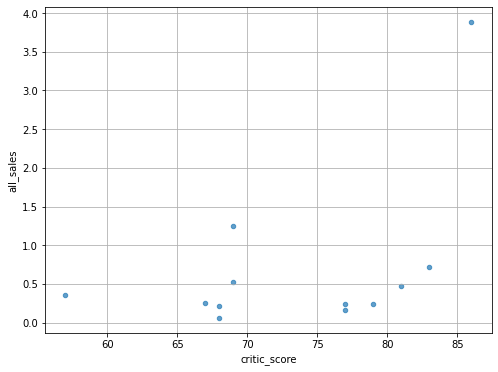

In [82]:
data_filtr_6_year.query('platform =="3DS" and genre == "Role-Playing"').\
plot(x='critic_score', y='all_sales', kind='scatter', figsize=(8, 6), grid=True, alpha=0.7)

In [83]:
data_filtr_3DS_Role_Playing = data_filtr_6_year.query('platform =="3DS" and genre == "Role-Playing"')
data_filtr_3DS_Role_Playing['critic_score'].corr(data_filtr_3DS_Role_Playing['all_sales'])

0.4670351710420245

In [84]:
data_filtr_3DS_Role_Playing = data_filtr_6_year.query('platform =="3DS" and genre == "Role-Playing"')
data_filtr_3DS_Role_Playing.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,41.000000,41.000000,41.000000,41.000000,41.000000,12.000000,12.000000,41.000000
mean,2014.707317,0.274146,0.166341,0.492439,0.043171,73.416667,7.675000,0.976098
std,0.749797,0.812656,0.584832,0.888864,0.133406,8.382431,1.088055,2.179471
min,2014.000000,0.000000,0.000000,0.000000,0.000000,57.000000,4.800000,0.030000
25%,2014.000000,0.000000,0.000000,0.060000,0.000000,68.000000,7.325000,0.070000
50%,2015.000000,0.020000,0.000000,0.120000,0.000000,73.000000,7.850000,0.200000
75%,2015.000000,0.160000,0.040000,0.280000,0.020000,79.500000,8.325000,0.720000
max,2016.000000,4.350000,3.490000,3.180000,0.740000,86.000000,8.800000,11.680000


<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

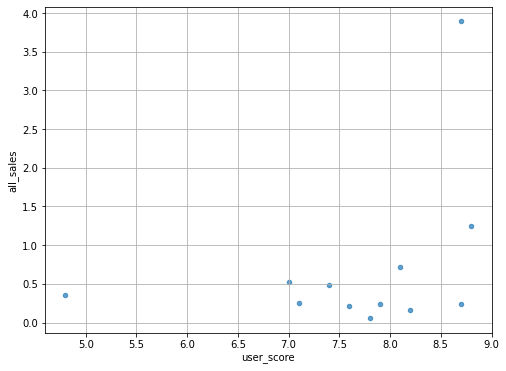

In [85]:
data_filtr_6_year.query('platform =="3DS" and genre == "Role-Playing"').\
plot(x='user_score', y='all_sales', kind='scatter', figsize=(8, 6), grid=True, alpha=0.7)

In [86]:
data_filtr_3DS_Role_Playing = data_filtr_6_year.query('platform =="3DS" and genre == "Role-Playing"')
data_filtr_3DS_Role_Playing['user_score'].corr(data_filtr_3DS_Role_Playing['all_sales'])

0.34906008075402734

Мы построили диаграммы рассеивания и нашли коэффициенты корреляции. 
    Можно сделать вывод, что зависимости между продажами игр и отзывами пользователей практически нет - коэффициент корреляции равен 0.21, есть единичные точки, которые говорят о том, что несколько популярных игр имеют высокие отзывы пользователей.
    Зависимость между продажами и отзывами критиков несколько выше-коэффициент корреляции - 0.31. Но опять же можно сказать, что связь слабая. Расчет коррелиции при выделении одного жанра на платформе так же подтвердил слабую связь.

#### Соотнесем выводы с продажами игр на других платформах

Сравним выводы выше с продажами на других платформах, возьмем PS4, WiiU, PSV

Платформа PS4:

(20.0, 100.0)

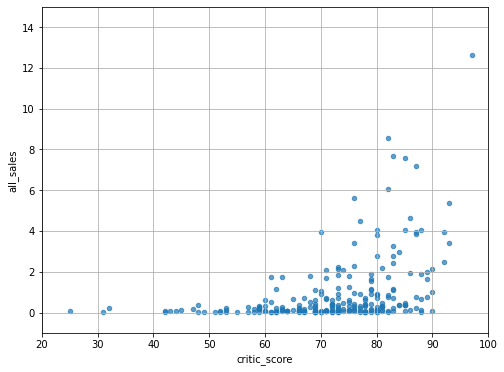

In [87]:
data_filtr_PS4 = data_filtr_6_year.query('platform =="PS4"')
data_filtr_6_year.query('platform =="PS4"').\
plot(x='critic_score', y='all_sales', kind='scatter', figsize=(8, 6), grid=True, alpha=0.7)

plt.ylim(-1,15)
plt.xlim(20,100)

In [88]:
data_filtr_PS4['critic_score'].corr(data_filtr_PS4['all_sales'])

0.40266141068104083

(2.0, 10.0)

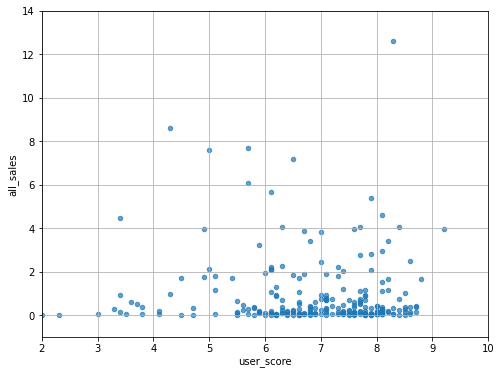

In [89]:
data_filtr_6_year.query('platform =="PS4"').\
plot(x='user_score', y='all_sales', kind='scatter', figsize=(8, 6), grid=True, alpha=0.7)

plt.ylim(-1,14)
plt.xlim(2,10)

In [90]:
data_filtr_PS4['user_score'].corr(data_filtr_PS4['all_sales'])

-0.040131589472697356

По платформе PS4 видим, что выводы выше повторяются, зависимость от отзывов пользователей отсутствует, зависимость от отзывов критиков есть, но она слабая.

Платформа WiiU:

(20.0, 100.0)

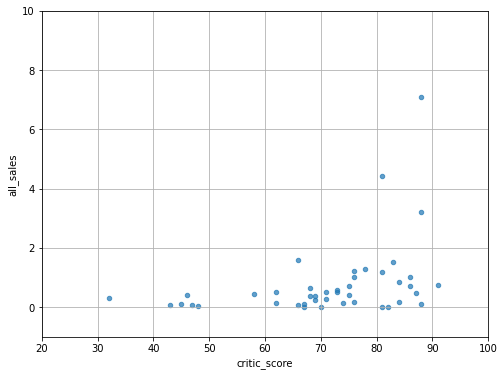

In [91]:
data_filtr_WiiU = data_filtr_6_year.query('platform =="WiiU"')
data_filtr_6_year.query('platform =="WiiU"').\
plot(x='critic_score', y='all_sales', kind='scatter', figsize=(8, 6), grid=True, alpha=0.7)

plt.ylim(-1,10)
plt.xlim(20,100)

In [92]:
data_filtr_WiiU['critic_score'].corr(data_filtr_WiiU['all_sales'])

0.370201412480884

(2.0, 10.0)

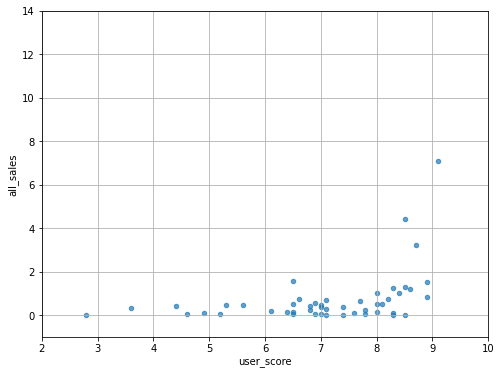

In [93]:
data_filtr_6_year.query('platform =="WiiU"').\
plot(x='user_score', y='all_sales', kind='scatter', figsize=(8, 6), grid=True, alpha=0.7)

plt.ylim(-1,14)
plt.xlim(2,10)

In [94]:
data_filtr_WiiU['user_score'].corr(data_filtr_WiiU['all_sales'])

0.40792645792170773

По платформе WiiU видим, что зависимость продаж от отзывов пользователей есть, коэффициент корреляции -  0.4, гораздо выше,чем у рассмотренных ранее платформ, но все же слабая. Зависимость от отзывов критиков есть, но она так же слабая.

Платформа PSV:

(20.0, 100.0)

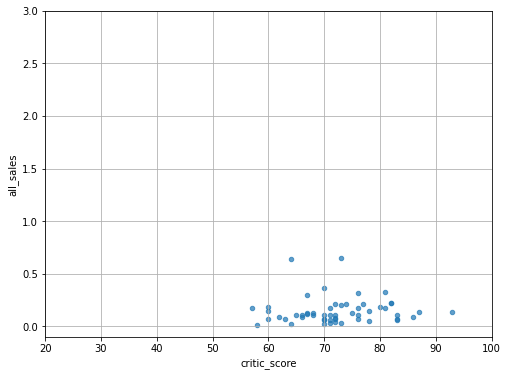

In [95]:
data_filtr_PSV = data_filtr_6_year.query('platform =="PSV"')
data_filtr_6_year.query('platform =="PSV"').\
plot(x='critic_score', y='all_sales', kind='scatter', figsize=(8, 6), grid=True, alpha=0.7)
plt.ylim(-0.1,3)
plt.xlim(20,100)

In [96]:
data_filtr_PSV['critic_score'].corr(data_filtr_PSV['all_sales'])

0.04266490657009526

(2.0, 10.0)

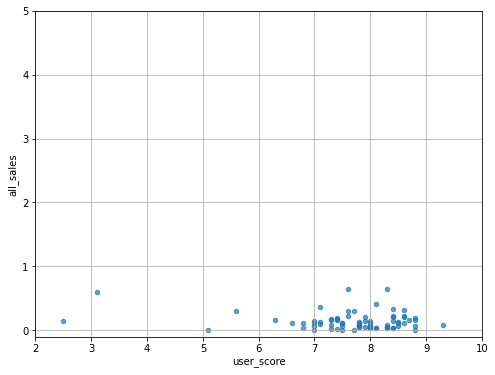

In [97]:
data_filtr_6_year.query('platform =="PSV"').\
plot(x='user_score', y='all_sales', kind='scatter', figsize=(8, 6), grid=True, alpha=0.7)

plt.ylim(-0.1,5)
plt.xlim(2,10)

In [98]:
data_filtr_PSV['user_score'].corr(data_filtr_PSV['all_sales'])

-0.16845504978064446

По платформе PSV видим, что зависимость от отзывов пользователей  и критиков отсутствует.

В целом можно сделать вывод, что зависимость между объемами продаж и отзывами пользователей/критиков незначительная, для отзывов пользователей в большей степени. Только малая часть игр при высоких рейтингах имеет так же высокий объем продаж.

#### Посмотрим на общее распределение игр по жанрам. (Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?)

Посмотрим на распределение долей жанров в общем объеме продаж с 2014 года:

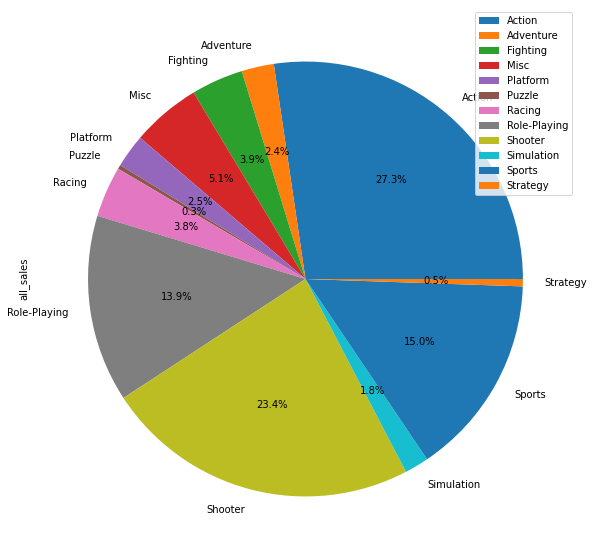

In [99]:
data_filtr_6_year.pivot_table(index='genre', values='all_sales', aggfunc='sum').\
plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', subplots=True)
plt.legend(loc='upper right')

In [100]:
data_filtr_6_year.pivot_table(index='genre', values='all_sales', aggfunc='sum').reset_index().\
sort_values(by='all_sales', ascending=False)

,genre,all_sales
0,Action,199.36
8,Shooter,170.94
10,Sports,109.48
7,Role-Playing,101.44
3,Misc,37.55
2,Fighting,28.22
6,Racing,27.52
4,Platform,18.09
1,Adventure,17.55
9,Simulation,13.13


In [101]:
t1 = data_filtr_6_year.pivot_table(index='genre', values='all_sales', aggfunc='sum').reset_index().\
sort_values(by='all_sales', ascending=False).head(5)
t1_genre = t1.genre.tolist()
print('По объемам продаж игр на платформах лидируют 5 жанров:', ', '.join(t1_genre))

По объемам продаж игр на платформах лидируют 5 жанров: Action, Shooter, Sports, Role-Playing, Misc


In [102]:
no_t1 = data_filtr_6_year.pivot_table(index='genre', values='all_sales', aggfunc='sum').reset_index().\
sort_values(by='all_sales', ascending=False).tail(5)
no_t1_genre = no_t1.genre.tolist()
print('По объемам продаж игр на платформах на последних местах 5 жанров:', ', '.join(no_t1_genre))

По объемам продаж игр на платформах на последних местах 5 жанров: Platform, Adventure, Simulation, Strategy, Puzzle


Посмотрим на распредление долей жанров в общем количестве выпущенных игр с 2014 года: 

array([<AxesSubplot:ylabel='name'>], dtype=object)

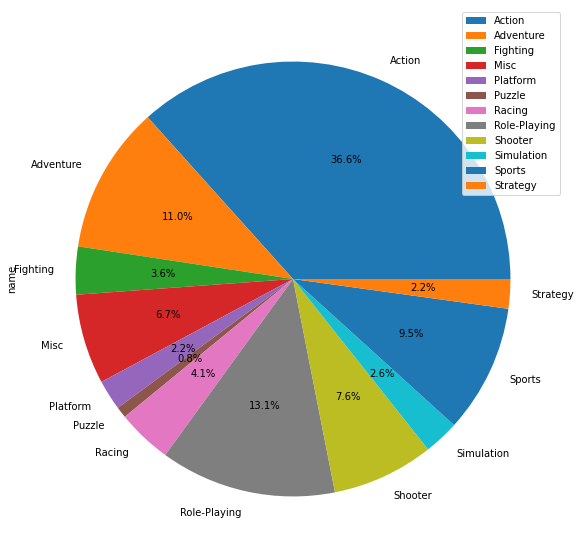

In [103]:
data_filtr_6_year.pivot_table(index='genre', values='name', aggfunc='count').\
plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', subplots=True)

In [104]:
count_game = data_filtr_6_year.pivot_table(index='genre', values='name', aggfunc='count').reset_index()
count_game.sort_values(by='name', ascending=False)

,genre,name
0,Action,619
7,Role-Playing,221
1,Adventure,185
10,Sports,161
8,Shooter,128
3,Misc,113
6,Racing,69
2,Fighting,60
9,Simulation,44
4,Platform,38


In [105]:
t2 = count_game.sort_values(by='name', ascending=False).head(6)
t2_genre = t2.genre.tolist()
print('По количеству выпущенных игр на платформах лидируют 6 жанров:', ', '.join(t2_genre))

По количеству выпущенных игр на платформах лидируют 6 жанров: Action, Role-Playing, Adventure, Sports, Shooter, Misc


In [106]:
no_t2 = count_game.sort_values(by='name', ascending=False).tail(6)
no_t2_genre = no_t2.genre.tolist()
print('По количеству выпущенных игр на платформах в конце списка 6 жанров:', ', '.join(no_t2_genre))

По количеству выпущенных игр на платформах в конце списка 6 жанров: Racing, Fighting, Simulation, Platform, Strategy, Puzzle


Чтобы понять, какие жанры наиболее прибыльные, расчитаем количество продаж на 1 игру по жанрам:

In [107]:
#Найдем объем продаж игр по каждому жанру, млн копий
sales_game = data_filtr_6_year.pivot_table(index='genre', values='all_sales', aggfunc='sum').\
sort_values(by='all_sales', ascending=False).reset_index()

In [108]:
count_game_one = count_game.merge(sales_game,how='left',left_on='genre',right_on='genre')
count_game_one

,genre,name,all_sales
0,Action,619,199.36
1,Adventure,185,17.55
2,Fighting,60,28.22
3,Misc,113,37.55
4,Platform,38,18.09
5,Puzzle,14,2.21
6,Racing,69,27.52
7,Role-Playing,221,101.44
8,Shooter,128,170.94
9,Simulation,44,13.13


In [109]:
#Посчитаем количество продаж на 1 игру в жанре
count_game_one['sales_one_game'] = count_game_one['all_sales'] / count_game_one['name']
count_game_one.sort_values(by='sales_one_game', ascending=False)
count_game_one_rus = count_game_one
count_game_one_rus = count_game_one_rus.rename (columns= {'genre': 'жанр','name': 'количество игр', 'all_sales': 'всего продаж, млн', 'sales_one_game': 'количество продаж на 1 игру, млн'})
count_game_one_rus.sort_values(by='количество продаж на 1 игру, млн', ascending=False)

,жанр,количество игр,"всего продаж, млн","количество продаж на 1 игру, млн"
8,Shooter,128,170.94,1.335469
10,Sports,161,109.48,0.680000
4,Platform,38,18.09,0.476053
2,Fighting,60,28.22,0.470333
7,Role-Playing,221,101.44,0.459005
6,Racing,69,27.52,0.398841
3,Misc,113,37.55,0.332301
0,Action,619,199.36,0.322068
9,Simulation,44,13.13,0.298409
5,Puzzle,14,2.21,0.157857


Самые выделяющиеся жанры, т.е. игры этих жанров покупались чаще:

In [110]:
top = count_game_one.sort_values(by='sales_one_game', ascending=False).head(5)
top_5_genre = top.genre.tolist()
print('Топ 5 жанров:', ', '.join(top_5_genre))

Топ 5 жанров: Shooter, Sports, Platform, Fighting, Role-Playing


Наименьшее количество продаж на 1 игру пришлось на жарны:

In [111]:
no_top = count_game_one.sort_values(by='sales_one_game', ascending=False).tail(5)
no_top_5_genre = no_top.genre.tolist()
print('Реже покупаются игры жанров:', ', '.join(no_top_5_genre))

Реже покупаются игры жанров: Action, Simulation, Puzzle, Strategy, Adventure


Посмотрим распределение игр по жанрам по годам и по платформам:

In [112]:
data_filtr_6_year.query('genre in @top_5_genre').\
pivot_table(index='genre', columns= 'platform', values='all_sales', aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
genre,,,,,,,,,,
Fighting,8.10,0.10,2.89,7.73,NaN,0.69,NaN,5.88,0.66,2.17
Platform,3.98,0.06,0.76,5.42,NaN,0.19,NaN,6.87,0.19,0.62
Role-Playing,40.02,4.87,6.63,28.99,NaN,6.10,NaN,1.52,2.76,10.55
Shooter,NaN,5.79,12.17,78.46,NaN,0.64,NaN,4.83,13.66,55.39
Sports,1.32,0.93,17.47,50.01,0.09,1.20,0.56,0.82,13.40,23.68


In [113]:
data_filtr_6_year.query('genre in @top_5_genre').\
pivot_table(index='genre', columns= 'year_of_release', values='all_sales', aggfunc='sum')

year_of_release,2014,2015,2016
genre,,,
Fighting,15.85,7.90,4.47
Platform,8.81,6.05,3.23
Role-Playing,45.62,37.64,18.18
Shooter,65.21,67.51,38.22
Sports,45.15,40.84,23.49


In [114]:
data_filtr_6_year.pivot_table(index='genre', columns= 'year_of_release', values='all_sales', aggfunc='sum')

year_of_release,2014,2015,2016
genre,,,
Action,97.23,72.02,30.11
Adventure,5.57,8.16,3.82
Fighting,15.85,7.90,4.47
Misc,23.38,11.57,2.60
Platform,8.81,6.05,3.23
Puzzle,1.49,0.71,0.01
Racing,16.66,8.07,2.79
Role-Playing,45.62,37.64,18.18
Shooter,65.21,67.51,38.22


Посмотрим на продажи жанров в разных регионах по годам и найдем разницу в объемах продаж 2014 и 2016 гг в %:

Продажи в Северной Америке:

In [115]:
data_filtr_6_year.query('genre in @top_5_genre').\
pivot_table(index='genre', columns= 'year_of_release', values='na_sales', aggfunc='sum')

year_of_release,2014,2015,2016
genre,,,
Fighting,6.89,3.70,1.84
Platform,3.01,2.49,1.29
Role-Playing,13.65,13.93,5.89
Shooter,30.84,31.94,16.24
Sports,19.82,18.77,7.54


In [116]:
NA = data_filtr_6_year.query('genre in @top_5_genre').\
pivot_table(index='genre', columns= 'year_of_release', values='na_sales', aggfunc='sum')
#NA.loc[:][2011]
NA['difference_na'] = round((1-NA.loc[:][2016]/NA.loc[:][2014])*100)
NA

year_of_release,2014,2015,2016,difference_na
genre,,,,
Fighting,6.89,3.70,1.84,73.0
Platform,3.01,2.49,1.29,57.0
Role-Playing,13.65,13.93,5.89,57.0
Shooter,30.84,31.94,16.24,47.0
Sports,19.82,18.77,7.54,62.0


Продажи в Европе:

In [117]:
data_filtr_6_year.query('genre in @top_5_genre').\
pivot_table(index='genre', columns= 'year_of_release', values='eu_sales', aggfunc='sum')

year_of_release,2014,2015,2016
genre,,,
Fighting,2.97,2.38,1.34
Platform,3.60,1.81,1.39
Role-Playing,10.96,12.93,4.28
Shooter,25.24,24.38,15.90
Sports,17.91,15.81,12.01


In [118]:
EU = data_filtr_6_year.query('genre in @top_5_genre').\
pivot_table(index='genre', columns= 'year_of_release', values='eu_sales', aggfunc='sum')
EU['difference_eu'] = round((EU.loc[:][2016]/EU.loc[:][2014])*100)
EU

year_of_release,2014,2015,2016,difference_eu
genre,,,,
Fighting,2.97,2.38,1.34,45.0
Platform,3.60,1.81,1.39,39.0
Role-Playing,10.96,12.93,4.28,39.0
Shooter,25.24,24.38,15.90,63.0
Sports,17.91,15.81,12.01,67.0


Продажи в Японии:

In [119]:
data_filtr_6_year.query('genre in @top_5_genre').\
pivot_table(index='genre', columns= 'year_of_release', values='jp_sales', aggfunc='sum')

year_of_release,2014,2015,2016
genre,,,
Fighting,4.83,0.79,0.75
Platform,1.27,1.31,0.11
Role-Playing,17.75,6.80,6.61
Shooter,1.08,2.73,1.06
Sports,1.61,0.73,0.92


In [120]:
JP = data_filtr_6_year.query('genre in @top_5_genre').\
pivot_table(index='genre', columns= 'year_of_release', values='jp_sales', aggfunc='sum')
JP['difference_jp'] = round((1-JP.loc[:][2016]/JP.loc[:][2014])*100)
JP

year_of_release,2014,2015,2016,difference_jp
genre,,,,
Fighting,4.83,0.79,0.75,84.0
Platform,1.27,1.31,0.11,91.0
Role-Playing,17.75,6.80,6.61,63.0
Shooter,1.08,2.73,1.06,2.0
Sports,1.61,0.73,0.92,43.0


Рассмотрим тажки категорию: остальные регионы

In [121]:
data_filtr_6_year.query('genre in @top_5_genre').\
pivot_table(index='genre', columns= 'year_of_release', values='other_sales', aggfunc='sum')

year_of_release,2014,2015,2016
genre,,,
Fighting,1.16,1.03,0.54
Platform,0.93,0.44,0.44
Role-Playing,3.26,3.98,1.40
Shooter,8.05,8.46,5.02
Sports,5.81,5.53,3.02


In [122]:
OS = data_filtr_6_year.query('genre in @top_5_genre').\
pivot_table(index='genre', columns= 'year_of_release', values='jp_sales', aggfunc='sum')
OS['difference_os'] = round((1-OS.loc[:][2016]/OS.loc[:][2014])*100)
OS

year_of_release,2014,2015,2016,difference_os
genre,,,,
Fighting,4.83,0.79,0.75,84.0
Platform,1.27,1.31,0.11,91.0
Role-Playing,17.75,6.80,6.61,63.0
Shooter,1.08,2.73,1.06,2.0
Sports,1.61,0.73,0.92,43.0


Падение продаж по регионам в %:

In [123]:
pd.concat([NA['difference_na'], EU['difference_eu'], JP['difference_jp'], OS['difference_os']],\
axis=1, keys=['NA', 'EU', 'JP', 'OS'])

,NA,EU,JP,OS
genre,,,,
Fighting,73.0,45.0,84.0,84.0
Platform,57.0,39.0,91.0,91.0
Role-Playing,57.0,39.0,63.0,63.0
Shooter,47.0,63.0,2.0,2.0
Sports,62.0,67.0,43.0,43.0


По результатам расчетов получили следующие итоги: наибольшую часть всего объема продаж занимают жанры: Action, Shooter, Sports, Role-Playing, Misc. Наименьшую часть: Platform, Adventure, Simulation, Strategy, Puzzle. Если учесть количество выпускаемых игр каждого жанра, получим жанры, игры которых покупают большее количество раз. К таким жанрам относятся: Shooter, Sports, Platform, Fighting, Role-Playing. К жанрам, игры которых покупают меньшее количество раз относятся: Action, Simulation, Puzzle, Strategy, Adventure. Т.о. хотя жанры Action и Misc показывают большие объемы продаж, прибыль от продаж игр этих жанров может быть не так велика, поскольку объемы достигнуты не только популярностью среди пользователей, но и большим количесnвом выпущенных игр(а это бОльшие затраты). Так же стоит отметить, что объемы продаж игр с 2012 года жанров Platform, Fighting резко снизились по всем рынкам, кроме Европы. Практически без изменений жанр Sports в Японии и в "остальных" регионах.

### Составим портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):


#### Самые популярные платформы (топ-5)

Для пользователей Северной Америки:

In [124]:
data_filtr_6_year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no _info,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no _info,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no _info,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no _info,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no _info,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no _info,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no _info,0.01


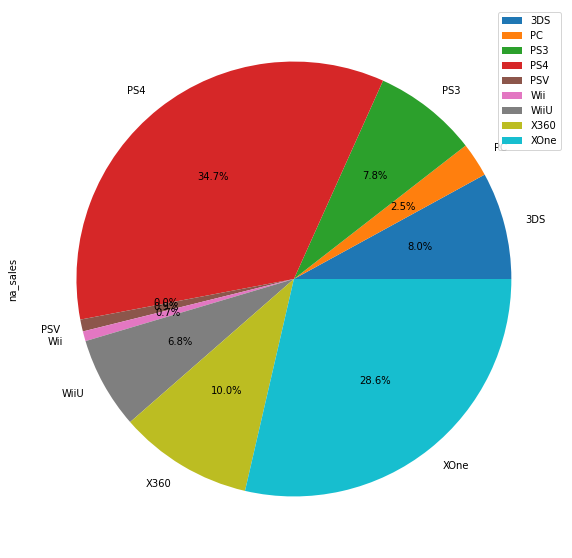

In [125]:
data_na_platform = data_filtr_6_year.pivot_table(index='platform', values='na_sales', aggfunc='sum').\
plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', subplots=True)#reset_index()

In [126]:
data_na_platform = data_filtr_6_year.pivot_table(index='platform', values='na_sales', aggfunc='sum')
data_na_platform.sort_values(by='na_sales', ascending=False)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36
PC,7.23
PSV,2.52
Wii,2.08


In [127]:
top_5_platform_na = data_na_platform.sort_values(by='na_sales', ascending=False).head(5)
top_5_platform_na
top_5_platform_na_l = top_5_platform_na.index.tolist()
print('Топ 5 платформ у пользователей Северной Америки:', ', '.join(top_5_platform_na_l))

Топ 5 платформ у пользователей Северной Америки: PS4, XOne, X360, 3DS, PS3


Им соответствуют доли продаж 34.7%, 28.6%, 10.0%, 8.0%, 7.8%. В сумме это 89.1 % от общего объема продаж за выбранный период.

Для пользователей Европы:

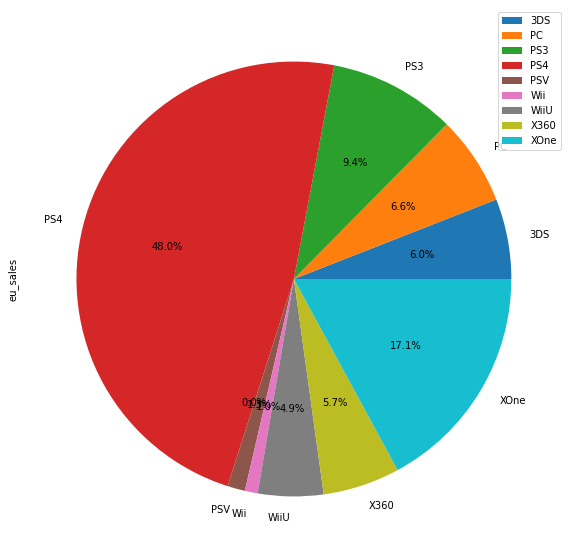

In [128]:
data_eu_platform = data_filtr_6_year.pivot_table(index='platform', values='eu_sales', aggfunc='sum').\
plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', subplots=True)

In [129]:
data_eu_platform = data_filtr_6_year.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
data_eu_platform.sort_values(by='eu_sales', ascending=False)

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


In [130]:
top_5_platform_eu = data_eu_platform.sort_values(by='eu_sales', ascending=False).head(5)
top_5_platform_eu
top_5_platform_eu_l = top_5_platform_eu.index.tolist()
print('Топ 5 платформ у пользователей Европы:', ', '.join(top_5_platform_eu_l))

Топ 5 платформ у пользователей Европы: PS4, XOne, PS3, PC, 3DS


Им соответствуют доли продаж 48.0%, 17.1%, 9.4%, 6.6%, 6.0%. В сумме это 87.1% от общего объема продаж за выбранный период.

Для пользователей Японии:

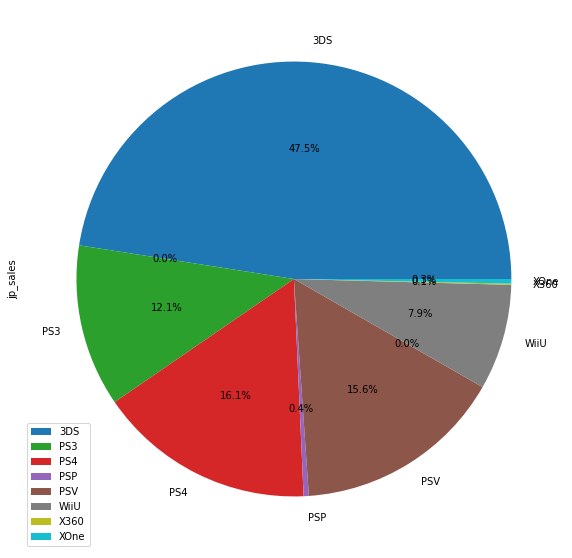

In [131]:
data_jp_platform = data_filtr_6_year.pivot_table(index='platform', values='jp_sales', aggfunc='sum').\
plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', subplots=True)

In [132]:
data_jp_platform = data_filtr_6_year.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
data_jp_platform.sort_values(by='jp_sales', ascending=False)

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
PSP,0.36
XOne,0.32
X360,0.08
PC,0.00


In [133]:
top_5_platform_jp = data_jp_platform.sort_values(by='jp_sales', ascending=False).head(5)

top_5_platform_jp
top_5_platform_jp_l = top_5_platform_jp.index.tolist()
print('Топ 5 платформ у пользователей Японии:', ', '.join(top_5_platform_jp_l))

Топ 5 платформ у пользователей Японии: 3DS, PS4, PSV, PS3, WiiU


Им соответствуют доли продаж 47.5%, 16.1%, 15.6%, 12.1%, 7.9%. В сумме это 99.2% от общего объема продаж за выбранный период.

In [134]:
details = {
    'na' : ['PS4', 'XOne', 'X360', '3DS', 'PS3'],
    'na_proc':[34.7, 28.6, 10.0, 8.0, 7.8],
    'eu' : ['PS4', 'XOne', 'PS3', 'PC','3DS'],
    'eu_proc':[48.0, 17.1, 9.4, 6.6, 6.0],
    'jp': ['3DS', 'PS4', 'PSV', 'PS3', 'WiiU'],
    'jp_proc':[47.5, 16.1, 15.6, 12.1, 7.9]
}
  

top_na_eu_jp = pd.DataFrame(details)
  
top_na_eu_jp

,na,na_proc,eu,eu_proc,jp,jp_proc
0,PS4,34.7,PS4,48.0,3DS,47.5
1,XOne,28.6,XOne,17.1,PS4,16.1
2,X360,10.0,PS3,9.4,PSV,15.6
3,3DS,8.0,PC,6.6,PS3,12.1
4,PS3,7.8,3DS,6.0,WiiU,7.9


Найдем количество продаж на 1 игру по платформам. Сначала найдем общее количество продаж, затем количество игр на платформе. Вычислим их соотношение.

Северная Америка:

In [135]:
data_na_platform_sales = data_filtr_6_year.pivot_table(index='platform', values='na_sales', aggfunc='sum')
data_na_platform.reset_index()


,platform,na_sales
0,3DS,22.64
1,PC,7.23
2,PS3,22.05
3,PS4,98.61
4,PSP,0.00
5,PSV,2.52
6,Wii,2.08
7,WiiU,19.36
8,X360,28.30
9,XOne,81.27


In [136]:
data_na_platform_count = data_filtr_6_year.pivot_table(index='platform', values='na_sales', aggfunc='count')
data_na_platform_count.reset_index()
data_na_platform_count = data_na_platform_count.rename (columns= {'na_sales': 'count'})
data_na_platform_count.reset_index()

,platform,count
0,3DS,212
1,PC,151
2,PS3,219
3,PS4,376
4,PSP,13
5,PSV,295
6,Wii,11
7,WiiU,73
8,X360,111
9,XOne,228


In [137]:
data_na_platform_count['sales_na'] = data_na_platform['na_sales']

data_na_platform_count['sales_one_game'] = data_na_platform['na_sales'] / data_na_platform_count['count']
data_na_platform_count.sort_values(by='sales_one_game', ascending=False)

,count,sales_na,sales_one_game
platform,,,
XOne,228,81.27,0.356447
WiiU,73,19.36,0.265205
PS4,376,98.61,0.262261
X360,111,28.30,0.254955
Wii,11,2.08,0.189091
3DS,212,22.64,0.106792
PS3,219,22.05,0.100685
PC,151,7.23,0.047881
PSV,295,2.52,0.008542


In [138]:
top_na_eu_jp

,na,na_proc,eu,eu_proc,jp,jp_proc
0,PS4,34.7,PS4,48.0,3DS,47.5
1,XOne,28.6,XOne,17.1,PS4,16.1
2,X360,10.0,PS3,9.4,PSV,15.6
3,3DS,8.0,PC,6.6,PS3,12.1
4,PS3,7.8,3DS,6.0,WiiU,7.9


Мы выяснили, что платформы PS4, XOne, X360, 3DS, PS3 занимают большую часть рынка по объемам продаж в Северной Америке, почти 89.1%. В перерасчете на количество покупок одной игры заданной платформы, получили, что не смотря на большой объем продаж, игры платформы покупают реже, например игр на платформе PS3 выпущено 493, а объем продаж 103.38 млн. за 6 лет(игры выпускались весь актуальный период). Тогда как игр на платформе XOne выпущено 247, а объем продаж 93.12 млн. копий за 4 года(начало выпуска игр 2013 г.). Этот факт может помочь сделать более точный прогноз по прибыли на 2017 г.

Европа:

In [139]:
data_eu_platform_sales = data_filtr_6_year.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
data_eu_platform.reset_index()


,platform,eu_sales
0,3DS,16.12
1,PC,17.97
2,PS3,25.54
3,PS4,130.04
4,PSP,0.00
5,PSV,3.53
6,Wii,2.59
7,WiiU,13.15
8,X360,15.49
9,XOne,46.25


In [140]:
data_eu_platform_count = data_filtr_6_year.pivot_table(index='platform', values='eu_sales', aggfunc='count')
data_eu_platform_count.reset_index()
data_eu_platform_count = data_eu_platform_count.rename (columns= {'eu_sales': 'count'})
data_eu_platform_count.reset_index()

,platform,count
0,3DS,212
1,PC,151
2,PS3,219
3,PS4,376
4,PSP,13
5,PSV,295
6,Wii,11
7,WiiU,73
8,X360,111
9,XOne,228


In [141]:
data_eu_platform_count['sales_eu'] = data_eu_platform['eu_sales']
data_eu_platform_count['sales_one_game'] = data_eu_platform['eu_sales'] / data_eu_platform_count['count']
data_eu_platform_count.sort_values(by='sales_one_game', ascending=False)

,count,sales_eu,sales_one_game
platform,,,
PS4,376,130.04,0.345851
Wii,11,2.59,0.235455
XOne,228,46.25,0.202851
WiiU,73,13.15,0.180137
X360,111,15.49,0.139550
PC,151,17.97,0.119007
PS3,219,25.54,0.116621
3DS,212,16.12,0.076038
PSV,295,3.53,0.011966


In [142]:
top_na_eu_jp

,na,na_proc,eu,eu_proc,jp,jp_proc
0,PS4,34.7,PS4,48.0,3DS,47.5
1,XOne,28.6,XOne,17.1,PS4,16.1
2,X360,10.0,PS3,9.4,PSV,15.6
3,3DS,8.0,PC,6.6,PS3,12.1
4,PS3,7.8,3DS,6.0,WiiU,7.9


Мы выяснили, что платформы PS4, XOne, PS3, PC, 3DS  занимают большую часть рынка по объемам продаж в Европе, почти 87.1%. В пересчете на количество покупок одной игры заданной платформы, получили, игры на платформе 3DS не так популярны как игры на других платформах в рейтинге. При выпуске 396 игр имеем 3.53 млн. проданных копий (с 2011 г на рынке), тогда как игр на платформе XOne выпущено 247 и имеем 51.59 млн. проданных копий ( с 2013 г на рынке).

Япония:

In [143]:
data_jp_platform_sales = data_filtr_6_year.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
data_jp_platform.reset_index()

,platform,jp_sales
0,3DS,44.24
1,PC,0.00
2,PS3,11.22
3,PS4,15.02
4,PSP,0.36
5,PSV,14.54
6,Wii,0.00
7,WiiU,7.31
8,X360,0.08
9,XOne,0.32


In [144]:
data_jp_platform_count = data_filtr_6_year.pivot_table(index='platform', values='jp_sales', aggfunc='count')
data_jp_platform_count.reset_index()
data_jp_platform_count = data_jp_platform_count.rename (columns= {'jp_sales': 'count'})
data_jp_platform_count.reset_index()

,platform,count
0,3DS,212
1,PC,151
2,PS3,219
3,PS4,376
4,PSP,13
5,PSV,295
6,Wii,11
7,WiiU,73
8,X360,111
9,XOne,228


In [145]:
data_jp_platform_count['sales_jp'] = data_jp_platform['jp_sales']
data_jp_platform_count['sales_one_game'] = data_jp_platform['jp_sales'] / data_jp_platform_count['count']
data_jp_platform_count.sort_values(by='sales_one_game', ascending=False)

,count,sales_jp,sales_one_game
platform,,,
3DS,212,44.24,0.208679
WiiU,73,7.31,0.100137
PS3,219,11.22,0.051233
PSV,295,14.54,0.049288
PS4,376,15.02,0.039947
PSP,13,0.36,0.027692
XOne,228,0.32,0.001404
X360,111,0.08,0.000721
PC,151,0.00,0.000000


In [146]:
top_na_eu_jp

,na,na_proc,eu,eu_proc,jp,jp_proc
0,PS4,34.7,PS4,48.0,3DS,47.5
1,XOne,28.6,XOne,17.1,PS4,16.1
2,X360,10.0,PS3,9.4,PSV,15.6
3,3DS,8.0,PC,6.6,PS3,12.1
4,PS3,7.8,3DS,6.0,WiiU,7.9


Мы выяснили, что платформы  3DS, PS4, PSV, PS3, WiiU  занимают большую часть рынка по объемам продаж в Японии, 99.2%. В пересчете на количество покупок одной игры заданной платформы, получили, что лидирует платформа 3DS, она же и лидер продаж. Можно отметить, что игр на платформах WiiU выпущено относительно немного, но они популярны. 
Так же видим, что среди пользователей Японии очень популярны платформы PSP, PSV, 3DS - игровые портативные консоли. 

Изучив популярные платформы можно сказать, топ-5 платформ занимают 87-99% рынков этих регионов. У пользователей Северной Америки и Европы большей популярностью пользуются игровые пристаки: X360, PS3, PS4, XOne, в меньшей степени портативные игровые приставки. В Северной Америке это приставки производства США Microsoft и приставки производства Sony, которых немного меньше. В Европе в основном приставки производства Sony, Япония. Так же в Европе распространена платформа PC-персональный компьютер.
В Японии наибольшее распространение имеют портативные игровые консоли. В меньшей степени распространены игровые приставки. И то и другое производство Япония,  Nintendo/Sony соответственно.

#### Самые популярные жанры (топ-5)


Продажи в Северной Америке 

In [147]:
data_na_genre = data_filtr_6_year.pivot_table(index='genre', values='na_sales', aggfunc='sum').\
sort_values(by='na_sales', ascending=False)
data_na_genre

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05
Fighting,12.43
Racing,8.74
Platform,6.79
Adventure,5.64


array([<AxesSubplot:ylabel='na_sales'>], dtype=object)

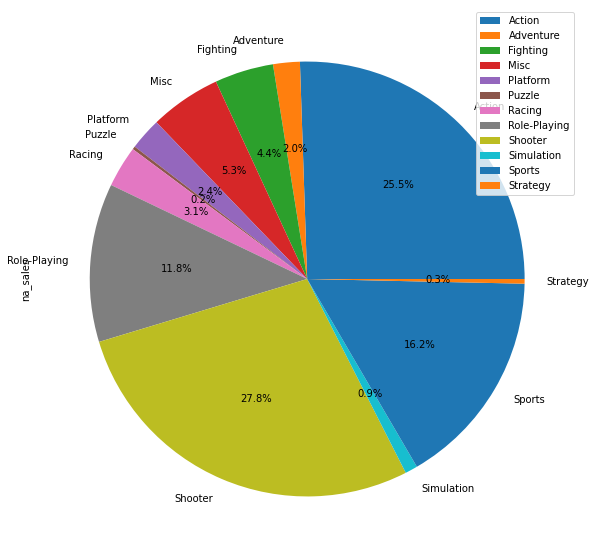

In [148]:
data_filtr_6_year.pivot_table(index='genre', values='na_sales', aggfunc='sum').\
plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', subplots=True)#reset_index()


In [149]:
#найдем топ-5 популярных жанров
data_na_genre.reset_index()
top_5_genre_na = data_na_genre.sort_values(by='na_sales', ascending=False).head(5)
top_5_genre_na_l = top_5_genre_na.index.tolist()
print('Топ 5 жанров у пользователей Северной Америки:', ', '.join(top_5_genre_na_l))

Топ 5 жанров у пользователей Северной Америки: Shooter, Action, Sports, Role-Playing, Misc


Продажи в Европе

In [150]:
data_eu_genre = data_filtr_6_year.pivot_table(index='genre', values='eu_sales', aggfunc='sum').\
sort_values(by='eu_sales', ascending=False)
data_eu_genre

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13
Misc,12.86
Simulation,7.30
Platform,6.80
Fighting,6.69


array([<AxesSubplot:ylabel='eu_sales'>], dtype=object)

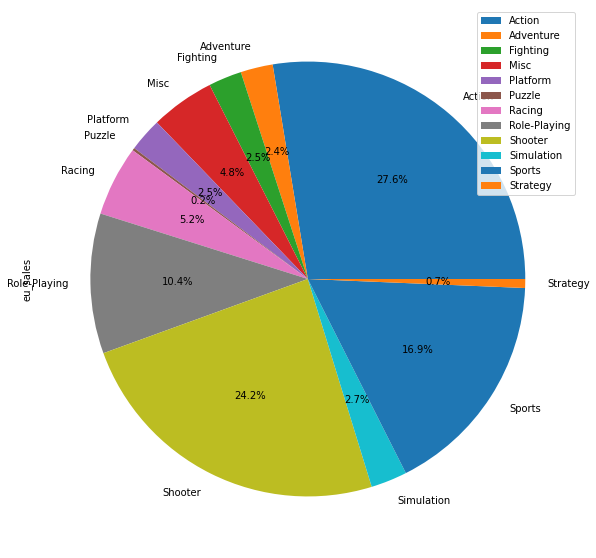

In [151]:
data_filtr_6_year.pivot_table(index='genre', values='eu_sales', aggfunc='sum').\
plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', subplots=True)#reset_index()

In [152]:
#найдем топ-5 популярных жанров
data_eu_genre.reset_index()
top_5_genre_eu = data_eu_genre.sort_values(by='eu_sales', ascending=False).head(5)
top_5_genre_eu_l = top_5_genre_eu.index.tolist()
print('Топ 5 жанров у пользователей Европы:', ', '.join(top_5_genre_eu_l))

Топ 5 жанров у пользователей Европы: Action, Shooter, Sports, Role-Playing, Racing


Продажи в Японии

In [153]:
data_jp_genre = data_filtr_6_year.pivot_table(index='genre', values='jp_sales', aggfunc='sum').\
sort_values(by='jp_sales', ascending=False)
data_jp_genre

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87
Adventure,3.60
Sports,3.26
Platform,2.69
Simulation,2.31


array([<AxesSubplot:ylabel='jp_sales'>], dtype=object)

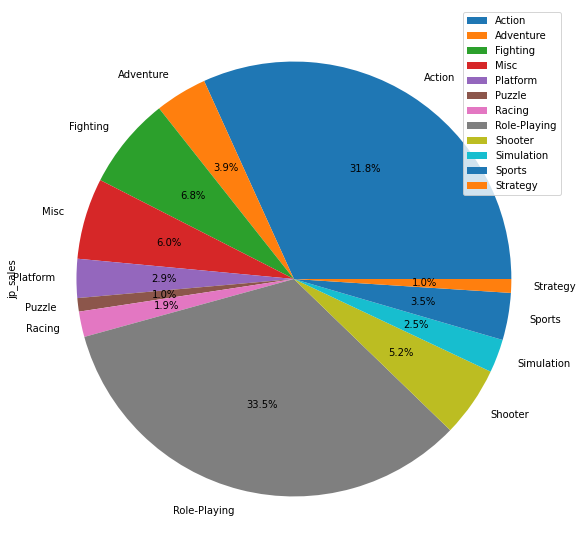

In [154]:
data_filtr_6_year.pivot_table(index='genre', values='jp_sales', aggfunc='sum').\
plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', subplots=True)

In [155]:
data_jp_genre.reset_index()
top_5_genre_jp = data_jp_genre.sort_values(by='jp_sales', ascending=False).head(5)
top_5_genre_jp_l = top_5_genre_jp.index.tolist()
print('Топ 5 жанров у пользователей Японии:', ', '.join(top_5_genre_jp_l))

Топ 5 жанров у пользователей Японии: Role-Playing, Action, Fighting, Misc, Shooter


Предпочтения пользователей Северной Америки и Европы в выборе жанра игры практически одинаковые, причем занимают почти равные  доли рынка продаж. Отличие в жанре на пятом месте. В Северной Америке это жанр Misc, в Европе это жанр Racing. С первого по четвертое место Action, Shooter, Sports, Role-Playing. 
В Японии же, среди пользователей, наиболее популярны немного другие жанры: Role-Playing, Action, Fighting, Misc, Shooter. Большинство покупаемых игр приходится на жанр Role-Playing, Action.
 Жанры, игры которых покупают в наименьшем объеме: Strategy	и Puzzle во всех регионах.	

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для начала разберемся, что обозначают символы в столбце:

ESRB - негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

«T» («Teen») — «Подросткам»,
E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»,
«M» («Mature») — «Для взрослых»,
«E» («Everyone») — «Для всех»,
EC» («Early childhood») — «Для детей младшего возраста»,
«RP» («Rating Pending») — «Рейтинг ожидается».

In [156]:
data_filtr_6_year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no _info,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no _info,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no _info,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no _info,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no _info,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no _info,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no _info,0.01


В Северной Америке:

In [157]:
data_filtr_6_year['rating'].unique()

array(['no _info', 'M', 'E', 'T', 'E10+'], dtype=object)

In [158]:
data_filtr_6_year.pivot_table(index=['genre','rating'], values='na_sales', aggfunc='sum')#.sort_values(by='na_sales', ascending=False)

na_sales
genre        rating            
Action       E             2.05
             E10+         13.78
             M            35.77
             T             7.19
             no _info     13.74
Adventure    E10+          0.73
             M             2.00
             T             0.21
             no _info      2.70
Fighting     E10+          0.61
             M             2.54
             T             2.81
             no _info      6.47
Misc         E             1.30
             E10+          4.60
             M             0.63
             T             2.23
             no _info      6.29
Platform     E             5.25
             E10+          0.69
             T             0.21
             no _info      0.64
Puzzle       E             0.59
             E10+          0.00
             no _info      0.06
Racing       E             6.07
             E10+          1.10
             T             0.66
             no _info      0.91
Role-Playing E             0.68
             E10+          0.63
             M            14.28
             T             3.79
             no _info     14.09
Shooter      E10+          3.57
             M            41.20
             T            15.44
             no _info     18.81
Simulation   E             0.65
             E10+          0.05
             T             1.18
             no _info      0.75
Sports       E            34.15
             E10+          7.25
             T             4.63
             no _info      0.10
Strategy     E10+          0.22
             T             0.60
             no _info      0.16

<AxesSubplot:title={'center':'Рейтинг ESRB в Северной Америке'}, xlabel='genre,rating'>

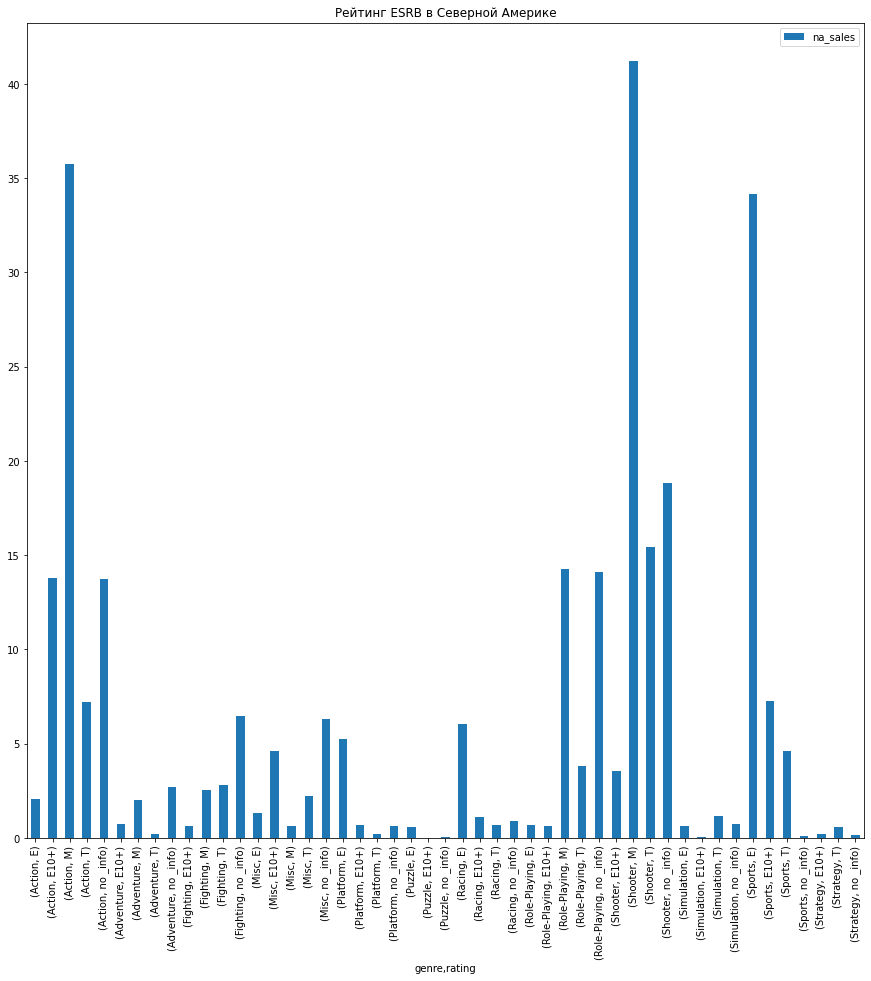

In [159]:
data_filtr_6_year.pivot_table(index=['genre','rating'], values='na_sales', aggfunc='sum').\
plot(kind='bar', fontsize=10, figsize=(15,15), title = 'Рейтинг ESRB в Северной Америке')

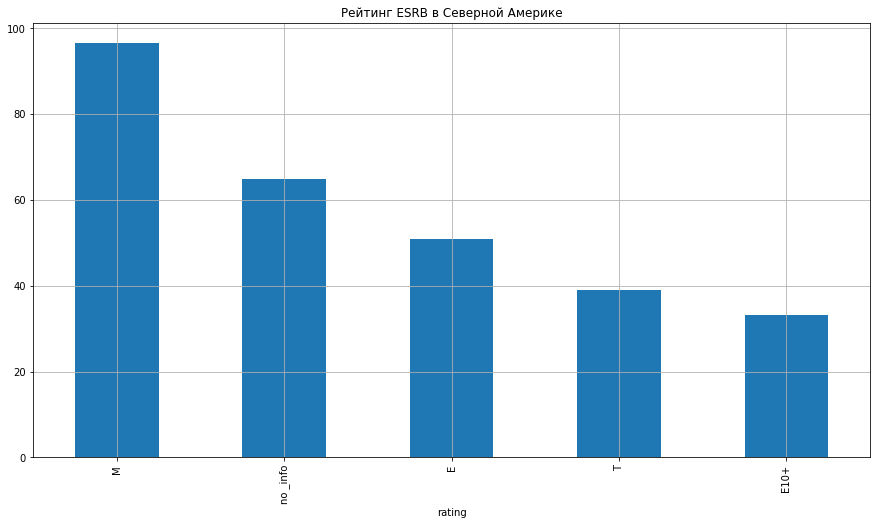

In [160]:
data_filtr_6_year.groupby('rating')['na_sales'].sum().sort_values(ascending=False).\
plot(kind = 'bar', title = 'Рейтинг ESRB в Северной Америке', grid=True, figsize=(15, 8));

По данным можем сказать, что среди игр самых популярных жанров Shooter и Action и т.д., наибольший объем продаж с рейтингом для взрослых, можно сделать вывод, что взрослая аудитория составляет большую часть покупателей. При понижении возрастных ограничений по жанру, такие жанры как: Sports, Misc, Fighting преобладают продажи категрий T и E10+, E. Жанры игр, которые доступны во всех категориях мы видим снижение продаж игр ретинга М, преобладают продажи игр ретинга E и E10+.

В Европе:

In [161]:
data_filtr_6_year.pivot_table(index=['genre','rating'], values='eu_sales', aggfunc='sum')

eu_sales
genre        rating            
Action       E             1.72
             E10+         13.13
             M            39.46
             T             7.13
             no _info     13.24
Adventure    E10+          0.91
             M             2.38
             T             0.28
             no _info      2.92
Fighting     E10+          0.29
             M             1.05
             T             2.52
             no _info      2.83
Misc         E             0.98
             E10+          2.97
             M             0.41
             T             1.15
             no _info      7.35
Platform     E             4.41
             E10+          1.25
             T             0.27
             no _info      0.87
Puzzle       E             0.39
             E10+          0.03
             no _info      0.10
Racing       E             8.37
             E10+          1.52
             T             1.71
             no _info      2.53
Role-Playing E             0.49
             E10+          0.40
             M            14.53
             T             2.65
             no _info     10.10
Shooter      E10+          3.02
             M            35.61
             T            10.80
             no _info     16.09
Simulation   E             2.59
             E10+          0.14
             T             2.38
             no _info      2.19
Sports       E            39.11
             E10+          1.93
             T             4.27
             no _info      0.42
Strategy     E10+          0.57
             T             0.91
             no _info      0.31

<AxesSubplot:title={'center':'Рейтинг ESRB в Европе'}, xlabel='genre,rating'>

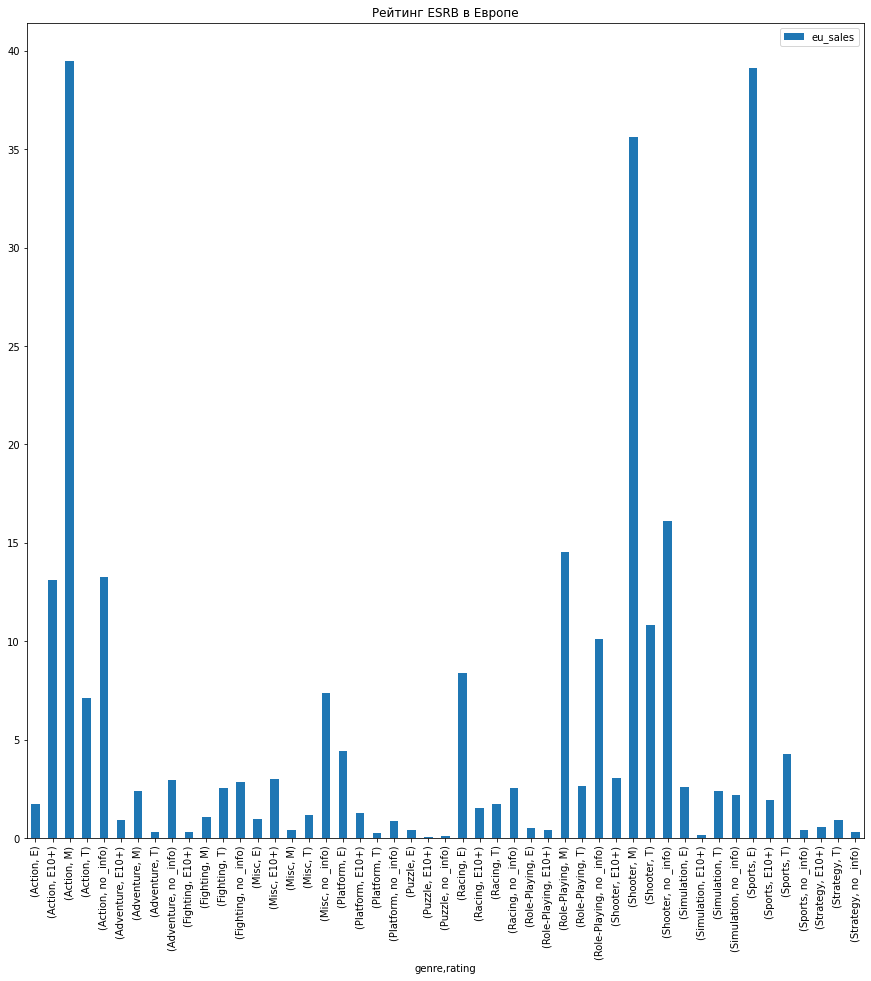

In [162]:
data_filtr_6_year.pivot_table(index=['genre','rating'], values='eu_sales', aggfunc='sum').\
plot(kind='bar', fontsize=10, figsize=(15,15),title = 'Рейтинг ESRB в Европе')

<AxesSubplot:title={'center':'Рейтинг ESRB в Европе'}, xlabel='rating'>

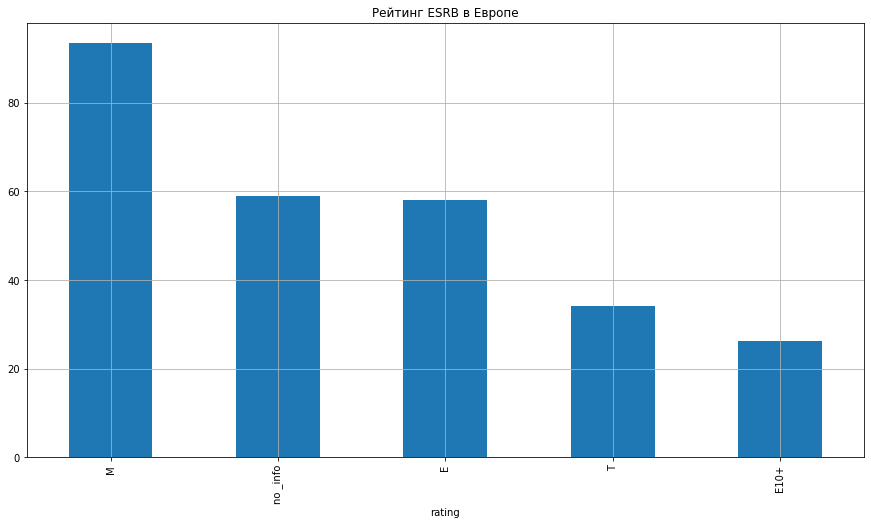

In [163]:
data_filtr_6_year.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).\
plot(kind = 'bar', title = 'Рейтинг ESRB в Европе', grid=True, figsize=(15, 8))

По данным можем сказать, что в Европе аналогичная ситуация распределения объема продаж в зависимости от рейтинга. Игры жанра Shooter и Action, наибольший объем продаж с рейтингом для взрослых, но эти игры изначально относятся к взрослым играм, значит что взрослая аудитория составляет большую часть покупателей. При понижении возрастных ограничений по жанру, такие жанры как: Sports, Misc, Fighting преобладают продажи категорий T и E10+, E. По жанрам игр, которые доступны во всех категориях, мы видим снижение продаж игр рейтинга М, преобладают продажи игр рейтинга E и E10+.

В Японии:

In [164]:
data_filtr_6_year.pivot_table(index=['genre','rating'], values='jp_sales', aggfunc='sum')

jp_sales
genre        rating            
Action       E             0.80
             E10+          1.00
             M             4.33
             T             3.32
             no _info     20.13
Adventure    E10+          0.00
             M             0.31
             T             0.03
             no _info      3.26
Fighting     E10+          0.17
             M             0.00
             T             1.69
             no _info      4.51
Misc         E             0.58
             E10+          0.10
             M             0.03
             T             0.68
             no _info      4.22
Platform     E             2.49
             E10+          0.03
             T             0.03
             no _info      0.14
Puzzle       E             0.26
             E10+          0.00
             no _info      0.67
Racing       E             1.44
             E10+          0.05
             T             0.03
             no _info      0.24
Role-Playing E             0.39
             E10+          1.04
             M             1.45
             T             8.17
             no _info     20.11
Shooter      E10+          1.55
             M             1.89
             T             0.73
             no _info      0.70
Simulation   E             1.40
             E10+          0.43
             T             0.06
             no _info      0.42
Sports       E             1.58
             E10+          0.09
             T             0.01
             no _info      1.58
Strategy     E10+          0.00
             T             0.03
             no _info      0.92

<AxesSubplot:title={'center':'Рейтинг ESRB в Японии'}, xlabel='genre,rating'>

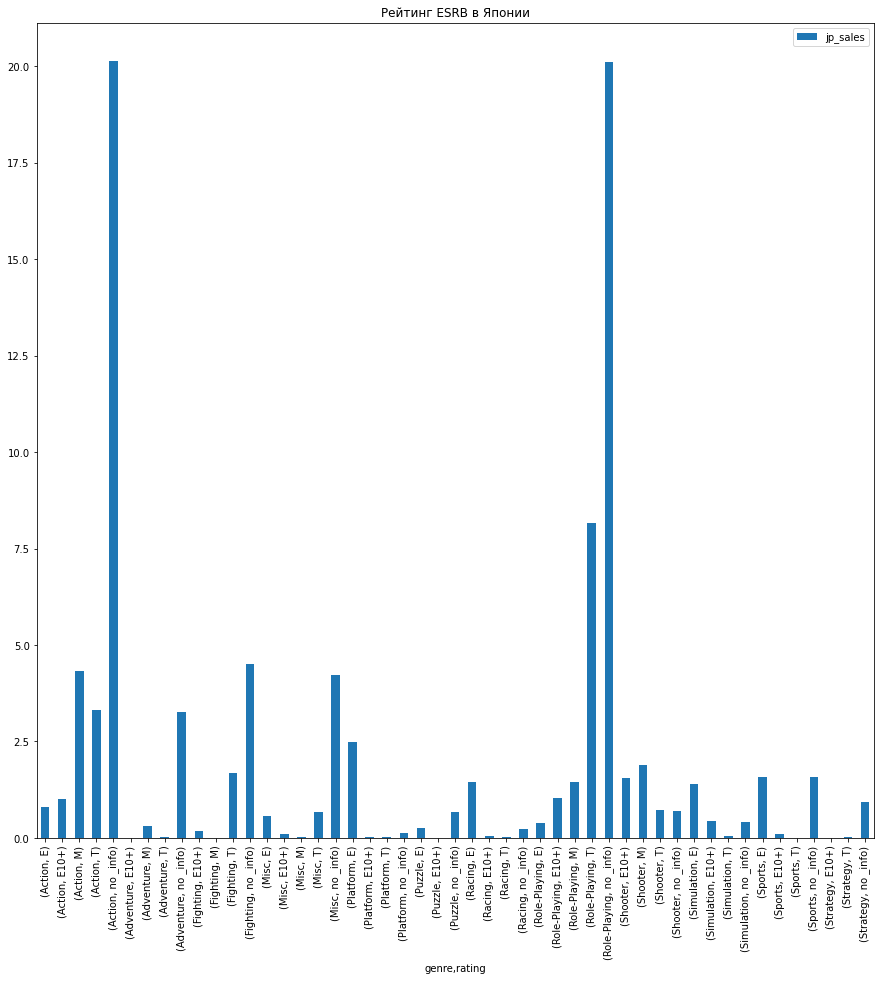

In [165]:
data_filtr_6_year.pivot_table(index=['genre','rating'], values='jp_sales', aggfunc='sum').\
plot(kind='bar', fontsize=10, figsize=(15,15),title = 'Рейтинг ESRB в Японии')

<AxesSubplot:title={'center':'Рейтинг ESRB в Японии'}, xlabel='rating'>

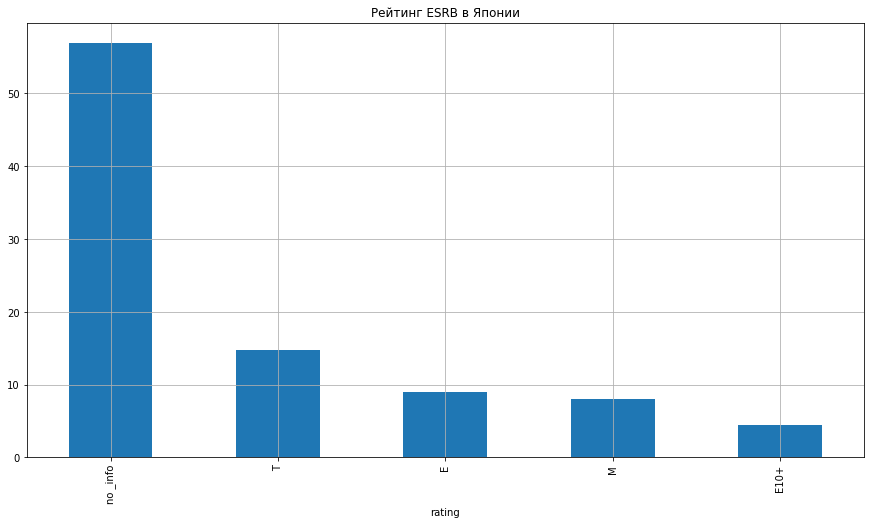

In [166]:
data_filtr_6_year.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).\
plot(kind = 'bar', title = 'Рейтинг ESRB в Японии', grid=True, figsize=(15, 8))

По данным можем сказать, что в Японии преобладает более молодая аудитория-тинейджеры. Они являются отсновными покупателями игр, самых популярных жанров в Японии. Так же на графике видим высокие продажи игр без рейтинга, возможно это игры японских производителей, у них другая система рейтингов. 

На основе выше сказанного можем составить наиболее вероятные портреты пользователей в Северной Америке, Европе и Японии:
- в Северной Америке это  скорее всего взрослый черовек, который предпочитает играть на игровых приставках PS4, XOne, X360 или XOne, предпочитаемые жанры Action, Shooter. 
- в Европе это тоже взрослый человек, который предпочитает играть на игровых приставках  PS4, XOne, предпочитаемые жанры Action, Shooter или Sports.
- в Японии это тинейджер, который предпочитает играть на портативном устройстве 3DS, в игры жанра Role-Playing или Action. 

###  Проверим гипотезы

#### Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

Первая гипотеза для проверки - средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Поскольку генеральные совокупности(пользовательские рейтинги) будут независимые, мы можем применить специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var). Возьмем обе выборки размером - 150, т.к. выборки одного размера и в них один и тот же параметр, equal_var можем не указывать в данном случае, оставим по умолчанию, критический уровень статистической значимости возьмем 0.05, ошибка в сфере продаж компьютерных игр не настолько критична, как например в сфере медицины.  
Так же дополнительно можем посчитать среднее двух выборок, результат должен подкрепить наш результат проверки гипотезы.


За нулевую гипотезу H₀ принимаем утверждение: средние рейтинги платформ Xbox One и PC равны.

За альтернативную H₁: средние рейтинги платформ Xbox One и PC не равны.

In [167]:
data_filtr_6_year.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no _info,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no _info,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no _info,7.98


In [168]:
data_filtr_6_year.loc[(data['platform']=='XOne')&(~data['user_score'].isna()),'user_score'].sample(100)

6487     5.5
1386     8.2
16015    7.1
13384    6.1
179      5.4
        ... 
7245     6.7
12863    5.2
16264    8.1
3401     5.7
15242    4.3
Name: user_score, Length: 100, dtype: float64

проверим гипотезу:

In [169]:
from scipy import stats as st
import numpy as np

Xbox_One = data_filtr_6_year.loc[(data['platform']=='XOne')&(~data['user_score'].isna()),'user_score'].\
sample(100).tolist()

PC = data_filtr_6_year.loc[(data['platform']=='PC')&(~data['user_score'].isna()),'user_score'].\
sample(100).tolist()

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    Xbox_One, 
    PC)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2805391079591879
Не получилось отвергнуть нулевую гипотезу


In [170]:
sum(Xbox_One)/len(Xbox_One)

6.645000000000001

In [171]:
sum(PC)/len(PC)

6.425000000000001

Получили практически одинаковые средние значения оценок пользователей по платформам Xbox One и PC, что и подтвердило наш результат проверки гипотезы: отвергнуть нулевую гипотезу не получилось.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Вторая гипотеза для проверки - средние пользовательские рейтинги жанров Action и Sports разные. Поскольку генеральные совокупности(пользовательские рейтинги) будут независимые, мы можем та же применить специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var). Возьмем обе выборки размером - 100, т.к. выборки одного размера и в них один и тот же параметр, equal_var можем не указывать в данном случае, оставим по умолчанию, критический уровень статистической значимости возьмем 0.05.
Так же дополнительно посчитаем среднее двух выборок, результат должен подкрепить наш результат проверки гипотезы.

 
За нулевую гипотезу H₀ принимаем утверждение: средние пользовательские рейтинги жанров Action и Sports равны.
    
За альтернативную H₁: средние пользовательские рейтинги жанров Action и Sports не равны.


In [172]:
from scipy import stats as st
import numpy as np

Action_user_score = data_filtr_6_year.loc[(data['genre']=='Action')&(~data['user_score'].isna()),'user_score'].\
sample(100).tolist()

Sports_user_score = data_filtr_6_year.loc[(data['genre']=='Sports')&(~data['user_score'].isna()),'user_score'].\
sample(100).tolist()

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    Action_user_score, 
    Sports_user_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3347938011369325e-10
Отвергаем нулевую гипотезу


In [173]:
sum(Action_user_score)/len(Action_user_score)

6.827000000000002

In [174]:
sum(Sports_user_score)/len(Sports_user_score)

5.299000000000001

Получили разные средние значения оценок пользователей по жанром Action и Sports, что и подтвердило наш результат проверки гипотезы: нулевую гипотезу отвергли.

### Общий вывод

В нашем распоряжении были данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нам необходимо было выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
В базе достаточно много пропусков в информации по оценкам и рейтингам игр.

Данные были обработаны, установили причину пропусков и заполнили их там, где это было необходимо. Строки, где пропуски были критичны - удалили. Поменяли типы данных в столбцах для проведения расчетов.
В ходе исследований определили, что срок жизни игровой платформы составляет около 10 лет, на протяжении 5-6 лет продажи игр на платформе растут, достигают пика, следующие годы продажи падают и платформа постепенно уходит с рынка. Стоит отметить одну из платформ, срок жизни которой больше 10 лет - это PC- персональный компьютер. Игры для PC начали выходить еще в 1994 г. И на протяжении более чем 20 лет продолжают выходить игры для это платформы. Объемы продаж на этой платформе имеют несколько скачков и падений, это связано с распространением PC среди пользователей с одой стороны и выходом других платформ с другой стороны, которые оказались наиболее популярными. На данный момент мы наблюдаем снижение объема продаж на PC, но объем продаж еще существенный.

Среди платформ, на сегодняшний день можно выделить потенциально прибыльные платформы: 3DS, PC, PS4, XOne, WiiU, PSV. Циклы их жизни находятся в начале, либо уже прошли пик по объемам продаж, но еще имеют потенциал.
Наибольшую часть всего объема продаж занимают жанры: Action, Shooter, Role-Playing, Sports, Misc. Наименьшую часть: Platform, Adventure, Simulation, Strategy, Puzzle. Если учесть количество выпускаемых игр каждого жанра, получим жанры, игры которых покупают большее количество раз. К таким жанрам относятся: Shooter, Sports, Platform, Fighting, Role-Playing. К жанрам, игры которых покупают меньшее количество раз относятся:  Action, Simulation, Puzzle, Strategy, Adventure. Т.о. хотя жанр Action и показывает большие объемы продаж, прибыль от продаж игр этих жанров может быть не так велика, поскольку объемы достигнуты не только популярностью среди пользователей, но и большим количесnвом выпущенных игр(а это бОльшие затраты). Так же стоит отметить, что объемы продаж игр с 2014 года жанров Platform, Fighting резко снизились по всем рынкам, кроме Европы. Практически без изменений жанр Sports в Японии и в "остальных" регионах.

При планировании кампаний на следующий год необходимо учесть регион продаж:
в нашем случае задача изучить 3 региона более детально: Северная Америка, Европа и Япония.

Мы выяснили, что платформы PS4, XOne, X360, 3DS, PS3 занимают большую часть рынка по объемам продаж в Северной Америке, почти 89%. В Европе занимают большую часть рынка по объемам продаж, почти 87%, платформы PS4, XOne, PS3, PC, 3DS. В Японии 99.1% рынка занимают платформы DS, PS4, PSV, PS3, WiiU. 

По жанрам имеем следующее распределение: предпочтения пользователей Северной Америки и Европы в выборе жанра игры практически одинаковые, причем занимают почти равные доли рынка продаж. Отличие в жанре на пятом месте. В Северной Америке это жанр Misc, в Европе это жанр Racing. С первого по четвертое место Action, Shooter, Sports, Role-Playing. В Японии же, среди пользователей, наиболее популярны немного другие жанры: Role-Playing, Action, Misc, Simulation, Fighting. Так же стоит отметить, что в Японии очень популярны игры японских компаний, они имеют рейтинг другой системы, не ESRB. Поскольку нам не известены категории этих игр, точной портрета пользователя мы составить не можем. 

Основная аудитория покупателей в Северной Америке и Европе - взрослые. В Японии аудитория более молодая - тинейджеры и дети старше 10 лет.
Т.о. наиболее вероятные портреты пользователей в этих регионах:

 - в Северной Америке это скорее всего взрослый черовек, который предпочитает играть на игровых приставках PS4 или XOne, предпочитаемые жанры Action, Shooter.
 - в Европе это тоже взрослый человек, который предпочитает играть на игровых приставках  PS4, XOne, предпочитаемые жанры Action, Shooter или Sports.
- в Японии это тинейджер, который предпочитает играть на портативном устройстве, с большей вероятностью это консоль 3DS, в игры жанра Role-Playing или Action. Поскольку нам неизвестны категории большой части игр, продаваемой в Японии, точного портрета пользователя по возрасту мы составить не можем. 

Так же исследование показало, что оценки критиков практически не влияют на объемы продаж, а зависимости между оценками пользователей и объемами продаж нет совсем. Поэтому при планировании компаний на следующий год ориентироваться на эти оценки не стоит.